# **A Comprehensive Exploratory Data Analysis on Bank Fraud Dataset**

This notebook marks the second installment in the bank fraud analysis dataset series. In the [**previous part**](https://www.kaggle.com/code/mohammadbolandraftar/combine-datasets-in-pandas), we focused on consolidating the datasets to lay the foundation for our analysis.

# **Introduction: Exploring Bank Fraud Detection**
In this notebook, we embark on a comprehensive journey through various steps of analyzing the [**bank fraud dataset**](https://www.kaggle.com/datasets/mohammadbolandraftar/my-dataset). Our goal is to uncover insights and patterns that will pave the way for robust fraud detection strategies. Here's an overview of the key steps covered:

**1. Analyzing the Target Column**

We begin by closely examining the target column, an essential starting point to understand the distribution of fraudulent cases and genuine transactions. This step sets the foundation for our subsequent analyses.

**2. Evaluating Missing Values**

Missing data can significantly impact the quality of our analysis and machine learning models. We delve into missing values, assessing their presence across different features, and strategizing how to handle them effectively.

**3. Feature Categorization and Correlation Analysis**

As we prepare our data for analysis and machine learning, we encounter a pivotal juncture: handling correlations between features. Depending on the Machine Learning (ML) model to be employed, a decision must be made regarding whether to retain or eliminate highly-correlated columns.

In our current analysis, we take the route of enhancing model interpretability and efficiency by removing columns displaying significant correlations. Furthermore, we engage in feature engineering, crossing certain features to derive new ones. These novel features, aptly named "ratio" columns, hold the potential to provide deeper insights into fraudulent activities.

**4. In-Depth Analysis of Merged Features**

One of the highlights of this analysis is our exploration of merged features from the "test_dataset." Features like CITY, BROWSER_FAMILY, TIME_SPENT, etc. provide valuable insights into potential fraudulent activities. We dive deep into these merged features, unveiling hidden patterns that can be pivotal in fraud detection.

**5. Transforming and Saving Datasets**

To ensure our analysis is replicable and applicable, we walk through the process of transforming the datasets after implementing various insights. This step not only consolidates our findings but also prepares the data for future stages of modeling.

Now, Let's begin!

## **Importing Libraries**

In [706]:
import numpy as np 
import pandas as pd 
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

## **Calling Saved Datasets From Step One**

In [707]:
train_df = pd.read_csv("/kaggle/input/my-dataset/train_dataset_combined.csv")
test_df = pd.read_csv("/kaggle/input/my-dataset/test_dataset_combined.csv")

In [708]:
train_df.head(1)

,SESSION_ID,EVENT_DATETIME,TRANSACTION_ID,FRAUD_FLAG,AVAIL_CRDT,AMOUNT,CREDIT_LIMIT,CARD_NOT_PRESENT,FLAG_LX,FLAG_ATM,FLAG_AUTO,FLAG_CASH,FLAG_APPAREL,FLAG_DEAL,FLAG_RECREA,FLAG_ENTERTAINMENT,FLAG_GIFT_CARD,FLAG_FASTFOOD,FLAG_GAS,FLAG_HIGH_AMT,FLAG_HIGH_RECREA,FLAG_INTERNET,FLAG_INTERNATIONAL,FLAG_FASHION,FLAG_LOW_AMT,FLAG_MANUAL_ENTRY,FLAG_ELCTRNCS,FLAG_SWIPE,FLAG_HEALTH,MEAN_AUTO_PAST_7DAY,MEAN_APPAREL_PAST_7DAY,MEAN_RECREA_PAST_7DAY,MEAN_GIFT_CARD_PAST_7DAY,MEAN_FASTFOOD_PAST_7DAY,MEAN_HIGH_AMT_PAST_7DAY,MEAN_HIGH_RECREA_PAST_7DAY,MEAN_INTERNET_PAST_7DAY,MEAN_INTERNATIONAL_PAST_7DAY,MEAN_FASHION_PAST_7DAY,MEAN_LOW_AMT_PAST_7DAY,MEAN_MANUAL_ENTRY_PAST_7DAY,MEAN_ELCTRNCS_PAST_7DAY,MEAN_SWIPE_PAST_7DAY,MEAN_HEALTH_PAST_7DAY,MEAN_WEEKEND_PAST_7DAY,MAX_CASH_PAST_7DAY,MAX_APPAREL_PAST_7DAY,MAX_RECREA_PAST_7DAY,MAX_HIGH_AMT_PAST_7DAY,MAX_HIGH_RECREA_PAST_7DAY,MAX_INTERNET_PAST_7DAY,MAX_SWIPE_PAST_7DAY,MAX_WEEKEND_PAST_7DAY,STD_LX_PAST_7DAY,STD_FASTFOOD_PAST_7DAY,STD_HIGH_AMT_PAST_7DAY,STD_INTERNET_PAST_7DAY,STD_LOW_AMT_PAST_7DAY,STD_SWIPE_PAST_7DAY,STD_HEALTH_PAST_7DAY,SUM_LX_PAST_7DAY,SUM_AUTO_PAST_7DAY,SUM_APPAREL_PAST_7DAY,SUM_RECREA_PAST_7DAY,SUM_GAS_PAST_7DAY,SUM_HIGH_AMT_PAST_7DAY,SUM_INTERNET_PAST_7DAY,SUM_INTERNATIONAL_PAST_7DAY,SUM_LOW_AMT_PAST_7DAY,SUM_MANUAL_ENTRY_PAST_7DAY,SUM_PARTIAL_PAST_7DAY,SUM_ELCTRNCS_PAST_7DAY,SUM_SWIPE_PAST_7DAY,SUM_WEEKEND_PAST_7DAY,COUNT_AUTO_PAST_7DAY,COUNT_ENTERTAINMENT_PAST_7DAY,COUNT_GAS_PAST_7DAY,COUNT_HIGH_AMT_PAST_7DAY,COUNT_INTERNET_PAST_7DAY,COUNT_LOW_AMT_PAST_7DAY,COUNT_MANUAL_ENTRY_PAST_7DAY,COUNT_SWIPE_PAST_7DAY,COUNT_HEALTH_PAST_7DAY,COUNT_WEEKEND_PAST_7DAY,MEAN_AUTO_PAST_30DAY,MEAN_DEAL_PAST_30DAY,MEAN_RECREA_PAST_30DAY,MEAN_ENTERTAINMENT_PAST_30DAY,MEAN_GIFT_CARD_PAST_30DAY,MEAN_HIGH_AMT_PAST_30DAY,MEAN_INTERNET_PAST_30DAY,MEAN_LOW_AMT_PAST_30DAY,MEAN_MANUAL_ENTRY_PAST_30DAY,MEAN_ELCTRNCS_PAST_30DAY,MEAN_SWIPE_PAST_30DAY,MEAN_HEALTH_PAST_30DAY,MEAN_WEEKEND_PAST_30DAY,MAX_AUTO_PAST_30DAY,MAX_APPAREL_PAST_30DAY,MAX_ENTERTAINMENT_PAST_30DAY,MAX_FASTFOOD_PAST_30DAY,MAX_HIGH_RECREA_PAST_30DAY,MAX_MANUAL_ENTRY_PAST_30DAY,MAX_PARTIAL_PAST_30DAY,MAX_WEEKEND_PAST_30DAY,STD_AUTO_PAST_30DAY,STD_APPAREL_PAST_30DAY,STD_RECREA_PAST_30DAY,STD_ENTERTAINMENT_PAST_30DAY,STD_GIFT_CARD_PAST_30DAY,STD_HIGH_RECREA_PAST_30DAY,STD_INTERNET_PAST_30DAY,STD_LOW_AMT_PAST_30DAY,STD_MANUAL_ENTRY_PAST_30DAY,STD_PARTIAL_PAST_30DAY,STD_SWIPE_PAST_30DAY,STD_HEALTH_PAST_30DAY,SUM_AUTO_PAST_30DAY,SUM_APPAREL_PAST_30DAY,SUM_DEAL_PAST_30DAY,SUM_RECREA_PAST_30DAY,SUM_ENTERTAINMENT_PAST_30DAY,SUM_GIFT_CARD_PAST_30DAY,SUM_FASTFOOD_PAST_30DAY,SUM_GAS_PAST_30DAY,SUM_HIGH_AMT_PAST_30DAY,SUM_HIGH_RECREA_PAST_30DAY,SUM_INTERNET_PAST_30DAY,SUM_INTERNATIONAL_PAST_30DAY,SUM_LOW_AMT_PAST_30DAY,SUM_MANUAL_ENTRY_PAST_30DAY,SUM_SWIPE_PAST_30DAY,SUM_WEEKEND_PAST_30DAY,COUNT_AUTO_PAST_30DAY,COUNT_RECREA_PAST_30DAY,COUNT_GIFT_CARD_PAST_30DAY,COUNT_FASTFOOD_PAST_30DAY,COUNT_GAS_PAST_30DAY,COUNT_HIGH_AMT_PAST_30DAY,COUNT_INTERNET_PAST_30DAY,COUNT_LOW_AMT_PAST_30DAY,COUNT_MANUAL_ENTRY_PAST_30DAY,COUNT_ELCTRNCS_PAST_30DAY,COUNT_SWIPE_PAST_30DAY,COUNT_HEALTH_PAST_30DAY,COUNT_WEEKEND_PAST_30DAY,TIMESTAMP_MIN,TIMESTAMP_MAX,PAGE_NAME,BROWSER_FAMILY,BROWSER_VERSION,OS_FAMILY,DEVICE_FAMILY,DEVICE_BRAND,DEVICE_MODEL,CITY,TIME_SPENT
0,9cc2c261-b73e-4f73-94c7-cc5d78e01148,2022-03-02 15:40:49,71f8a325e,1.0,7420.73,69.7,14600.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,341.25,358.75,0.0,358.75,0.0,26.32,0.0,0.0,0.0,358.75,0.0,15.6,0.0,0.0,0.0,0.0,358.75,341.25,0.0,26.32,15.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,358.75,0.0,358.75,27.68,0.0,0.0,358.75,0.0,0.0,15.6,0.0,0,0,0,0,1,0,0,1,0,0,0.0,0.0,358.75,0.0,341.25,341.25,26.32,0.0,341.25,0.0,16.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,358.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,341.25,0.0,358.75,0.0,0.0,341.25,0.0,27.68,0.0,0.0,341.25,15.6,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,2022-03-02 15:40:49,2022-03-02 15:47:22,"{'checkout', '2-factor-authentication', 'home-page', 's

# **1. Analyzing Target Column**

percentage of fraud (1.0) and non-fraud(1.0) cases in the dataset:
0.0    92.29
1.0     7.71
Name: FRAUD_FLAG, dtype: float64



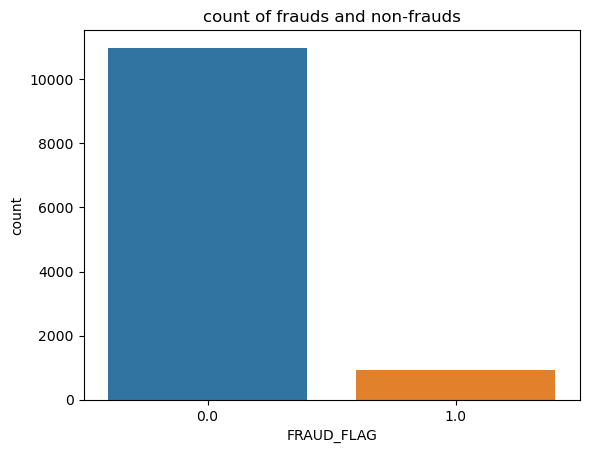

In [709]:
print("percentage of fraud (1.0) and non-fraud(1.0) cases in the dataset:")
print(round(train_df["FRAUD_FLAG"].value_counts(normalize=True)*100, 2))
print()

sns.countplot(data=train_df, x="FRAUD_FLAG")
plt.title("count of frauds and non-frauds")
plt.show()

The landscape of our dataset reveals a significant class imbalance, a common challenge in fraud detection scenarios. In such cases, the choice of evaluation metrics plays a crucial role in capturing the model's true performance.

Given our circumstances, the prime metrics under consideration include precision, recall, F1-score, and the AUC-ROC score. The selection of the ultimate metric hinges on the unique line of business needs. In our case, the F1-score takes center stage. The F1-score harmoniously blends precision and recall, aligning with our goal of comprehensive fraud detection.

### **Checking Duplicates**

In [710]:
train_df.duplicated().sum()

0

### **Streamlining Data: Dropping Redundant Columns**
As our analysis evolves, so does the refinement of our dataset. In pursuit of a more focused and efficient exploration, we've identified columns that have fulfilled their purpose and are no longer essential for our current objectives.

The SESSION_ID, once instrumental in data combination, has served its role and is no longer integral to our analysis. Similarly, the TRANSACTION_ID, while reserved for future model submission, doesn't contribute to our ongoing exploration. To simplify our dataset, we've made the decision to unnecessary columns. 

In [711]:
train_df.drop(["SESSION_ID", "TRANSACTION_ID"], axis=1, inplace=True)
test_df.drop(["SESSION_ID", "TRANSACTION_ID"], axis=1, inplace=True)

# **2. Evaluating Missing Values**

Missing values can be like missing puzzle pieces in our dataset. Tehy demanding careful consideration and strategic solutions. Our journey through this data wouldn't be complete without addressing these gaps in information.

To begin, we undertake a systematic culling of columns where over 50% of the values are absent. This pragmatic approach streamlines our analysis, ensuring that we focus our efforts where the data is most robust.

In [712]:
missings = pd.DataFrame((train_df.isna().mean()*100).sort_values(ascending=False), columns=["missing %"])
missings

,missing %
BROWSER_VERSION,63.471394
DEVICE_MODEL,10.199109
DEVICE_BRAND,10.199109
EVENT_DATETIME,0.000000
STD_ENTERTAINMENT_PAST_30DAY,0.000000
...,...
STD_FASTFOOD_PAST_7DAY,0.000000
STD_HIGH_AMT_PAST_7DAY,0.000000
STD_INTERNET_PAST_7DAY,0.000000
STD_LOW_AMT_PAST_7DAY,0.000000


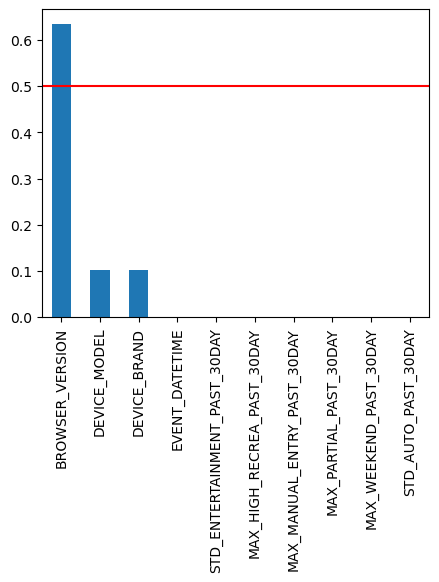

In [713]:
train_df.isnull().mean().sort_values(ascending=False).head(10).plot(kind="bar", figsize=(5,4))
plt.axhline(y=0.5, color="red")
plt.show()

In [714]:
train_df.drop(["BROWSER_VERSION"], axis=1, inplace=True)
test_df.drop(["BROWSER_VERSION"], axis=1, inplace=True)

# **3. Feature Categorization and Correlation Analysis**

### **Simplifying Uniqueness: Zeroes and Ones (this happens in columns with all NaN)**

**Hypothesis:** ML model is not able to learn from columns with only one unique value. We'll keep the columns for now, but in the training phase, we'll remove the columns to see if the model performance changes or not.

In [715]:
one_or_zer_unique_val_features = [col for col in train_df.columns if train_df[col].nunique() <= 1]
one_or_zer_unique_val_features

['CARD_NOT_PRESENT',
 'FLAG_ATM',
 'FLAG_CASH',
 'FLAG_RECREA',
 'FLAG_FASTFOOD',
 'FLAG_GAS',
 'FLAG_HIGH_RECREA',
 'FLAG_INTERNET',
 'FLAG_MANUAL_ENTRY',
 'FLAG_SWIPE']

In [716]:
train_df["FLAG_ATM"].value_counts()

0    11903
Name: FLAG_ATM, dtype: int64

### **Grouping Columns By Category**

By grouping columns into categories, we're setting the stage for some efficient Exploratory Data Analysis (EDA). There are 21 "flag" columns in the dataset. We'll create 21 categories First. The non-flagged columns are categorized into "other" columns

In [717]:
flag_columns = list(train_df.filter(regex=r"^FLAG").columns)
print("number of flags:", len(flag_columns))
print()
print("name of flags")
print(flag_columns)
print()

lx_columns = list(train_df.columns[train_df.columns.str.lower().str.contains("lx")])
atm_columns = list(train_df.columns[train_df.columns.str.lower().str.contains("atm")])
auto_columns = list(train_df.columns[train_df.columns.str.lower().str.contains("auto")])
cash_columns = list(train_df.columns[train_df.columns.str.lower().str.contains("cash")])
apparel_columns = list(train_df.columns[train_df.columns.str.lower().str.contains("apparel")])
deal_columns = list(train_df.columns[train_df.columns.str.lower().str.contains("deal")])

entertainment_columns = list(train_df.columns[train_df.columns.str.lower().str.contains("entertainment")])
gift_card_columns = list(train_df.columns[train_df.columns.str.lower().str.contains("gift_card")])
fastfood_columns = list(train_df.columns[train_df.columns.str.lower().str.contains("fast")])
gas_columns = list(train_df.columns[train_df.columns.str.lower().str.contains("gas")])
high_amt_columns = list(train_df.columns[train_df.columns.str.lower().str.contains("high_amt")])

high_recrea_columns = list(train_df.columns[train_df.columns.str.lower().str.contains("high_recrea")])
temp = list(train_df.columns[train_df.columns.str.lower().str.contains("recrea")])
recrea_columns = [col for col in temp if col not in high_recrea_columns]

internet_columns = list(train_df.columns[train_df.columns.str.lower().str.contains("internet")])
international_columns = list(train_df.columns[train_df.columns.str.lower().str.contains("international")])
fashion_columns = list(train_df.columns[train_df.columns.str.lower().str.contains("fashion")])
low_amt_columns = list(train_df.columns[train_df.columns.str.lower().str.contains("low_amt")])
manual_columns = list(train_df.columns[train_df.columns.str.lower().str.contains("manual")])
elctrncs_columns = list(train_df.columns[train_df.columns.str.lower().str.contains("elctrncs")])
swipe_columns = list(train_df.columns[train_df.columns.str.lower().str.contains("swipe")])
health_columns = list(train_df.columns[train_df.columns.str.lower().str.contains("health")])

weekend_columns = list(train_df.columns[train_df.columns.str.lower().str.contains("weekend")])
partial_columns = list(train_df.columns[train_df.columns.str.lower().str.contains("partial")])

print("number of columns in train_df:", len(train_df.columns))
print("number columns in categories:", len(lx_columns) + len(atm_columns) + len(auto_columns) + len(cash_columns) + len(apparel_columns) + len(deal_columns)\
      + len(recrea_columns) + len(entertainment_columns) + len(gift_card_columns) + len(fastfood_columns) + len(gas_columns) + len(high_amt_columns)\
      + len(high_recrea_columns) + len(internet_columns) + len(international_columns) + len(fashion_columns) + len(low_amt_columns)\
      + len(manual_columns) + len(elctrncs_columns) + len(swipe_columns) + len(health_columns) + len(weekend_columns) + len(partial_columns))

other_cols = [col for col in train_df.columns if col not in lx_columns + atm_columns + auto_columns + cash_columns + apparel_columns
              + deal_columns + recrea_columns + entertainment_columns + gift_card_columns + fastfood_columns + gas_columns + high_amt_columns\
             + high_recrea_columns + internet_columns + international_columns + fashion_columns + low_amt_columns + manual_columns + elctrncs_columns\
             + swipe_columns + health_columns + weekend_columns + partial_columns]

print("length of other_cols:", len(other_cols))
print()
print("list of columns in other_columns:")
print(other_cols)

number of flags: 21

name of flags
['FLAG_LX', 'FLAG_ATM', 'FLAG_AUTO', 'FLAG_CASH', 'FLAG_APPAREL', 'FLAG_DEAL', 'FLAG_RECREA', 'FLAG_ENTERTAINMENT', 'FLAG_GIFT_CARD', 'FLAG_FASTFOOD', 'FLAG_GAS', 'FLAG_HIGH_AMT', 'FLAG_HIGH_RECREA', 'FLAG_INTERNET', 'FLAG_INTERNATIONAL', 'FLAG_FASHION', 'FLAG_LOW_AMT', 'FLAG_MANUAL_ENTRY', 'FLAG_ELCTRNCS', 'FLAG_SWIPE', 'FLAG_HEALTH']

number of columns in train_df: 154
number columns in categories: 138
length of other_cols: 16

list of columns in other_columns:
['EVENT_DATETIME', 'FRAUD_FLAG', 'AVAIL_CRDT', 'AMOUNT', 'CREDIT_LIMIT', 'CARD_NOT_PRESENT', 'TIMESTAMP_MIN', 'TIMESTAMP_MAX', 'PAGE_NAME', 'BROWSER_FAMILY', 'OS_FAMILY', 'DEVICE_FAMILY', 'DEVICE_BRAND', 'DEVICE_MODEL', 'CITY', 'TIME_SPENT']


### **Unveiling Column Insights: Frauds and Flags**

In [718]:
var_list = []
num_of_frauds = []
percentage_of_fraud = []
num_of_non_frauds = []
percentage_of_non_fraud = []

for col in flag_columns:
    var_list.append(col)
        
    num_of_frauds.append(train_df[train_df["FRAUD_FLAG"] == 1][col].sum())
    percentage = round(train_df[train_df["FRAUD_FLAG"] == 1][col].sum() / len(train_df[train_df["FRAUD_FLAG"] == 1]) * 100, 2)
    percentage_of_fraud.append(percentage)
    
    num_of_non_frauds.append(train_df[train_df["FRAUD_FLAG"] == 0][col].sum())
    percentage = round(train_df[train_df["FRAUD_FLAG"] == 0][col].sum() / len(train_df[train_df["FRAUD_FLAG"] == 0]) * 100, 2)
    percentage_of_non_fraud.append(percentage)


farud_based_on_flage_cols = pd.DataFrame({"# of frauds": num_of_frauds, "% of fraud" : percentage_of_fraud, 
                                          "# of non_frauds": num_of_non_frauds, "% of non_fraud" : percentage_of_non_fraud}, 
                                         index=var_list)
farud_based_on_flage_cols

,# of frauds,% of fraud,# of non_frauds,% of non_fraud
FLAG_LX,39,4.25,717,6.53
FLAG_ATM,0,0.00,0,0.00
FLAG_AUTO,1,0.11,62,0.56
FLAG_CASH,0,0.00,0,0.00
FLAG_APPAREL,287,31.26,2838,25.84
FLAG_DEAL,19,2.07,52,0.47
FLAG_RECREA,0,0.00,0,0.00
FLAG_ENTERTAINMENT,115,12.53,1066,9.70
FLAG_GIFT_CARD,270,29.41,464,4.22
FLAG_FASTFOOD,0,0.00,0,0.00


**Here's the scoop:** some columns like "FLAG_ATM," "FLAG_AUTO," and the gang, don't seem to hang out much with frauds. They're kind of like different cliques in the data world.

Then there's the enigmatic "FLAG_INTERNET" - it's like a magnet for frauds, with a full 100% of its encounters being fishy. 🕵️‍♂️


**We've got a hunch:** The flag columns with too few frauds might not be the best teachers for our machine. But no rush, we're keeping them around for now.

And oh, buckle up for the intriguing discoveries we've made. "FLAG_INTERNATIONAL" and "FLAG_GIFT_CARD" are the real chatterboxes. While most non-frauds shy away from international escapades (just 3.78% play in that field), a whopping 37.47% of frauds dance in international transactions. Same deal with gift cards. It's like the data is confirming what we've always suspected about the secret lives of frauds.

### **Evaluating Correlations in Flag Columns**

Get ready for the next lap – we've got some exciting moves planned for this step:

🔍 **Correlation Exploration:** We're diving into the matrix of correlations among our features. The goal? Spotting the strong buddies – those with a correlation of 70% or more (or less than -70%). If they're too chummy, we might just have to give one of them a little break.

🔧 **Creating New Magic:** Say hello to our secret weapon: crossing input features to whip up new metrics. Not only does this streamline our model's dimension, but it's like unlocking hidden treasure – revealing more about the intriguing world of frauds. We've got a special name for these newbies: "ratio" features. They're here to make our analysis pop!

📊 **Collinearity Check:** But wait, we're not done yet. If we're throwing a party for the ratio features, we're making sure it's not too crowded. We'll check for high collinearity among them, ensuring our data dance floor is as smooth as it gets.

**Quick note:** there's this idea floating around that machines can get a bit confused by super close friends – *the highly correlated features*. But here's the twist: the story changes based on the model we're talking about. Meet the cool kids on the block: Fandom Forest and XGBoost. These champs have secret weapons – their own built-in radar for the best features. Yep, they can see through the haze and pick out the shining stars all by themselves.

### **lx_columns**

In [719]:
print(lx_columns)

['FLAG_LX', 'STD_LX_PAST_7DAY', 'SUM_LX_PAST_7DAY']


In [720]:
train_df[lx_columns[1:]].describe()

,STD_LX_PAST_7DAY,SUM_LX_PAST_7DAY
count,11903.000000,11903.000000
mean,14.511755,78.731645
std,144.603801,494.775886
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,7726.930000,14676.670000


In [721]:
train_df[lx_columns].corr()

,FLAG_LX,STD_LX_PAST_7DAY,SUM_LX_PAST_7DAY
FLAG_LX,1.000000,0.040470,0.087894
STD_LX_PAST_7DAY,0.040470,1.000000,0.650608
SUM_LX_PAST_7DAY,0.087894,0.650608,1.000000


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


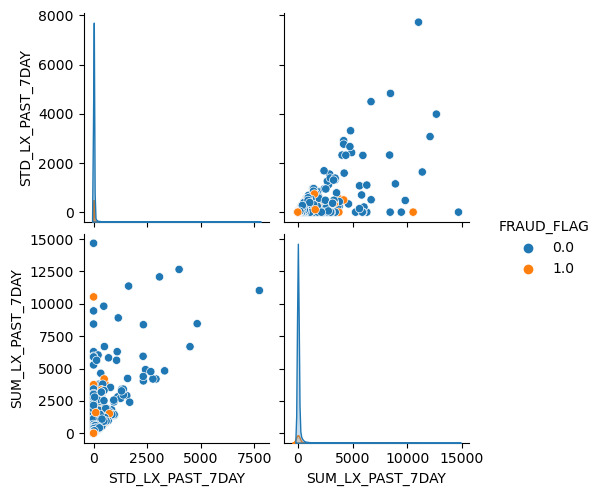

In [722]:
sns.pairplot(data=train_df[lx_columns[1:] + ["FRAUD_FLAG"]], hue="FRAUD_FLAG")
plt.show()

In [723]:
train_df["FLAG_LX"] = train_df["FLAG_LX"].astype("category")
test_df["FLAG_LX"] = test_df["FLAG_LX"].astype("category")

### **atm_columns**

In [724]:
print(atm_columns)

['FLAG_ATM']


In [725]:
train_df["FLAG_ATM"].value_counts()

0    11903
Name: FLAG_ATM, dtype: int64

it's just one variable with one unique value. We'll drop it!

In [726]:
train_df.drop(atm_columns, axis=1, inplace=True)
test_df.drop(atm_columns, axis=1, inplace=True)

### **auto_columns**

In [727]:
auto_columns

['FLAG_AUTO',
 'MEAN_AUTO_PAST_7DAY',
 'SUM_AUTO_PAST_7DAY',
 'COUNT_AUTO_PAST_7DAY',
 'MEAN_AUTO_PAST_30DAY',
 'MAX_AUTO_PAST_30DAY',
 'STD_AUTO_PAST_30DAY',
 'SUM_AUTO_PAST_30DAY',
 'COUNT_AUTO_PAST_30DAY']

In [728]:
train_df[auto_columns[1:]].corr()

,MEAN_AUTO_PAST_7DAY,SUM_AUTO_PAST_7DAY,COUNT_AUTO_PAST_7DAY,MEAN_AUTO_PAST_30DAY,MAX_AUTO_PAST_30DAY,STD_AUTO_PAST_30DAY,SUM_AUTO_PAST_30DAY,COUNT_AUTO_PAST_30DAY
MEAN_AUTO_PAST_7DAY,1.000000,0.860728,0.113075,0.474579,0.532285,0.483119,0.353669,0.086942
SUM_AUTO_PAST_7DAY,0.860728,1.000000,0.374537,0.434663,0.521815,0.453042,0.593522,0.319296
COUNT_AUTO_PAST_7DAY,0.113075,0.374537,1.000000,0.073776,0.162651,0.117359,0.437177,0.816895
MEAN_AUTO_PAST_30DAY,0.474579,0.434663,0.073776,1.000000,0.802567,0.499249,0.510702,0.090872
MAX_AUTO_PAST_30DAY,0.532285,0.521815,0.162651,0.802567,1.000000,0.836115,0.705980,0.224549
STD_AUTO_PAST_30DAY,0.483119,0.453042,0.117359,0.499249,0.836115,1.000000,0.566257,0.169473
SUM_AUTO_PAST_30DAY,0.353669,0.593522,0.437177,0.510702,0.705980,0.566257,1.000000,0.548303
COUNT_AUTO_PAST_30DAY,0.086942,0.319296,0.816895,0.090872,0.224549,0.169473,0.548303,1.000000


due to the high correlation, We'll drop the following:
"SUM_AUTO_PAST_7DAY" , "COUNT_AUTO_PAST_30DAY", "MAX_AUTO_PAST_30DAY"

In [729]:
train_df.drop(["SUM_AUTO_PAST_7DAY" , "COUNT_AUTO_PAST_30DAY", "MAX_AUTO_PAST_30DAY"], axis=1, inplace=True)
test_df.drop(["SUM_AUTO_PAST_7DAY" , "COUNT_AUTO_PAST_30DAY", "MAX_AUTO_PAST_30DAY"], axis=1, inplace=True)

We'll create and new column list for auto:

In [730]:
auto_columns_new = [col for col in auto_columns if col not in ["SUM_AUTO_PAST_7DAY" , "COUNT_AUTO_PAST_30DAY", 
                                                               "MAX_AUTO_PAST_30DAY"]]

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


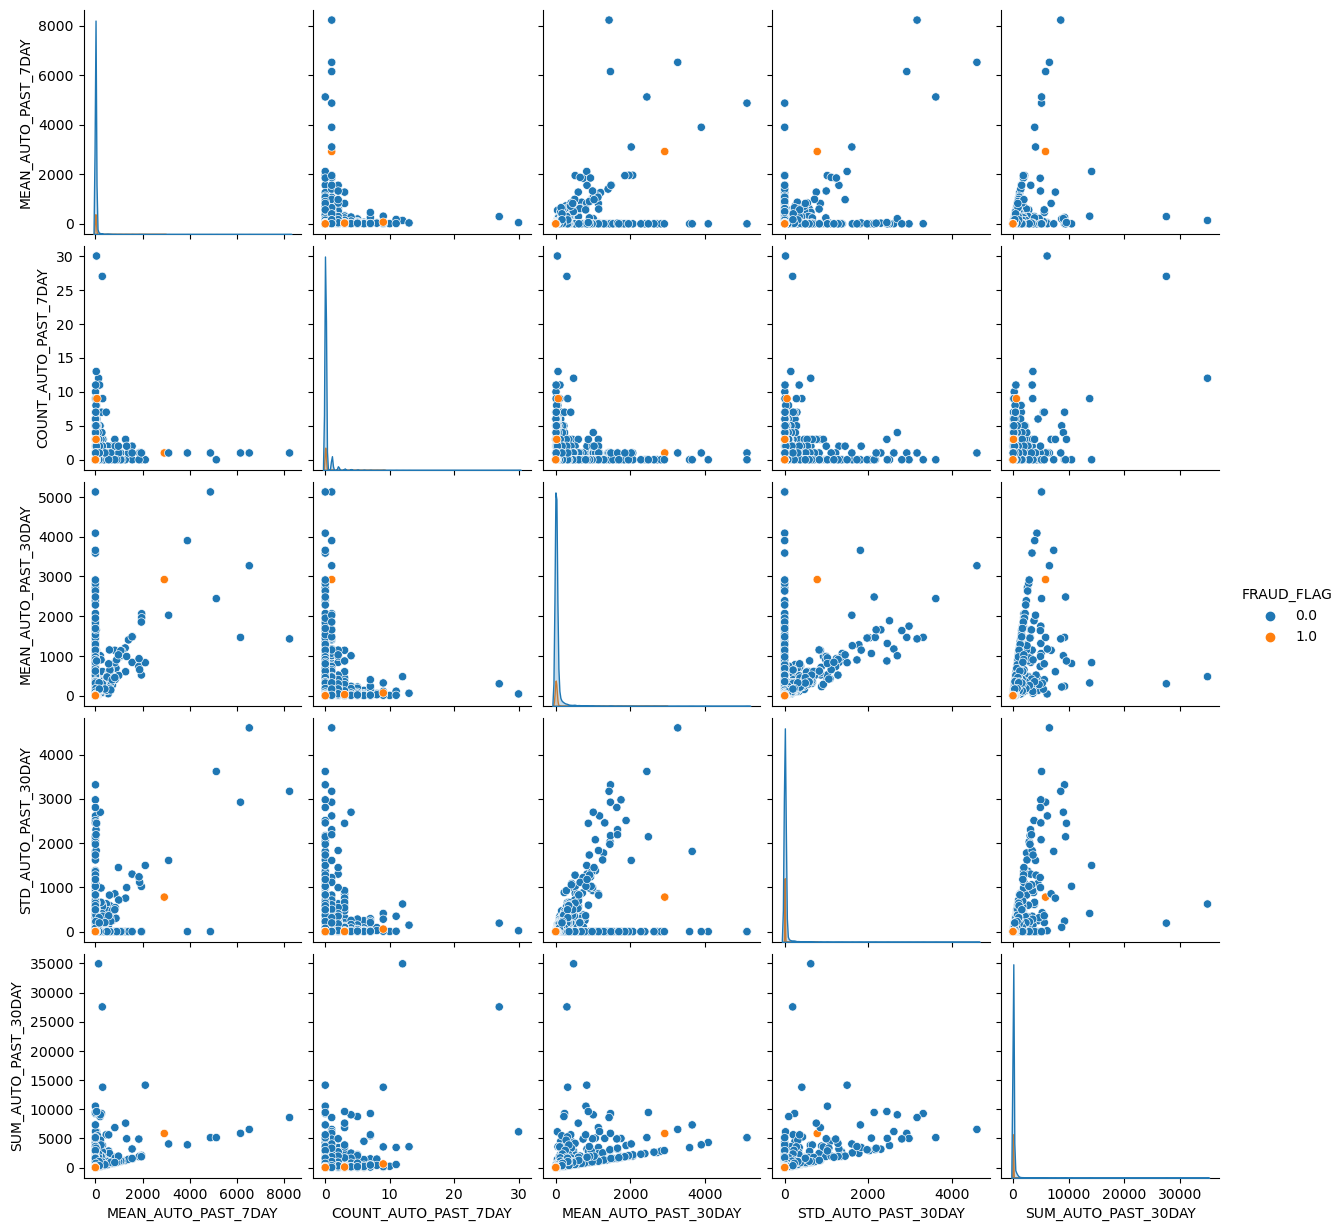

In [731]:
sns.pairplot(data=train_df[auto_columns_new[1:]+["FRAUD_FLAG"]], hue="FRAUD_FLAG")
plt.show()

In [732]:
auto_columns_new[1:]

['MEAN_AUTO_PAST_7DAY',
 'COUNT_AUTO_PAST_7DAY',
 'MEAN_AUTO_PAST_30DAY',
 'STD_AUTO_PAST_30DAY',
 'SUM_AUTO_PAST_30DAY']

In [733]:
train_df["auto_mean_ratio"] = train_df["MEAN_AUTO_PAST_7DAY"] / train_df["MEAN_AUTO_PAST_30DAY"]
train_df["auto_mean_ratio"] = train_df["auto_mean_ratio"].fillna(0)

train_df["auto_sum_ratio"] = (train_df["MEAN_AUTO_PAST_7DAY"] * train_df["COUNT_AUTO_PAST_7DAY"]) / train_df["SUM_AUTO_PAST_30DAY"]
train_df["auto_sum_ratio"] = train_df["auto_sum_ratio"].fillna(0)


test_df["auto_mean_ratio"] = test_df["MEAN_AUTO_PAST_7DAY"] / test_df["MEAN_AUTO_PAST_30DAY"]
test_df["auto_mean_ratio"] = test_df["auto_mean_ratio"].fillna(0)

test_df["auto_sum_ratio"] = (test_df["MEAN_AUTO_PAST_7DAY"] * test_df["COUNT_AUTO_PAST_7DAY"]) / test_df["SUM_AUTO_PAST_30DAY"]
test_df["auto_sum_ratio"] = test_df["auto_sum_ratio"].fillna(0)


In [734]:
new_auto_ratio_vars = ["auto_mean_ratio", "auto_sum_ratio"]

The priority will be given to the new "ratio" columns, as we believe that they contain more information.

In [735]:
train_df[auto_columns_new[1:] + new_auto_ratio_vars].corr()

,MEAN_AUTO_PAST_7DAY,COUNT_AUTO_PAST_7DAY,MEAN_AUTO_PAST_30DAY,STD_AUTO_PAST_30DAY,SUM_AUTO_PAST_30DAY,auto_mean_ratio,auto_sum_ratio
MEAN_AUTO_PAST_7DAY,1.000000,0.113075,0.474579,0.483119,0.353669,0.380819,0.258657
COUNT_AUTO_PAST_7DAY,0.113075,1.000000,0.073776,0.117359,0.437177,0.450835,0.500105
MEAN_AUTO_PAST_30DAY,0.474579,0.073776,1.000000,0.499249,0.510702,0.145810,0.133805
STD_AUTO_PAST_30DAY,0.483119,0.117359,0.499249,1.000000,0.566257,0.178383,0.098288
SUM_AUTO_PAST_30DAY,0.353669,0.437177,0.510702,0.566257,1.000000,0.186552,0.103992
auto_mean_ratio,0.380819,0.450835,0.145810,0.178383,0.186552,1.000000,0.655148
auto_sum_ratio,0.258657,0.500105,0.133805,0.098288,0.103992,0.655148,1.000000


In [736]:
train_df["FLAG_AUTO"] = train_df["FLAG_AUTO"].astype("category")
test_df["FLAG_AUTO"] = test_df["FLAG_AUTO"].astype("category")

### **cash_columns**

In [737]:
cash_columns

['FLAG_CASH', 'MAX_CASH_PAST_7DAY']

In [738]:
train_df["FLAG_CASH"].value_counts()

0    11903
Name: FLAG_CASH, dtype: int64

In [739]:
print("number of the MAX_CASH_PAST_7DAY > 0 in non-frauds:", train_df[(train_df["FRAUD_FLAG"] == 0) & (train_df["MAX_CASH_PAST_7DAY"] > 0)]["MAX_CASH_PAST_7DAY"].count())
print("number of the MAX_CASH_PAST_7DAY > 0 in frauds:", train_df[(train_df["FRAUD_FLAG"] == 1) & (train_df["MAX_CASH_PAST_7DAY"] > 0)]["MAX_CASH_PAST_7DAY"].count())

number of the MAX_CASH_PAST_7DAY > 0 in non-frauds: 69
number of the MAX_CASH_PAST_7DAY > 0 in frauds: 1


Let's talk about "MAX_CASH_PAST_7DAY." It's been hanging out with zeros and showing no interest in mingling with frauds – the flag's stuck on 0 for every row. And when it comes to non-zero action, it's a party of 70, with just one fraud case stepping in.

Facing these numbers, we're saying our goodbyes. These columns aren't bringing much to the table, so we're doing a data declutter – both "MAX_CASH_PAST_7DAY" and its accompanying flag are gracefully bowing out.

In [740]:
train_df.drop(cash_columns, axis=1, inplace=True)
test_df.drop(cash_columns, axis=1, inplace=True)

### **apparel_columns**

In [741]:
print(apparel_columns)
print()
train_df[apparel_columns].corr()

['FLAG_APPAREL', 'MEAN_APPAREL_PAST_7DAY', 'MAX_APPAREL_PAST_7DAY', 'SUM_APPAREL_PAST_7DAY', 'MAX_APPAREL_PAST_30DAY', 'STD_APPAREL_PAST_30DAY', 'SUM_APPAREL_PAST_30DAY']



,FLAG_APPAREL,MEAN_APPAREL_PAST_7DAY,MAX_APPAREL_PAST_7DAY,SUM_APPAREL_PAST_7DAY,MAX_APPAREL_PAST_30DAY,STD_APPAREL_PAST_30DAY,SUM_APPAREL_PAST_30DAY
FLAG_APPAREL,1.000000,0.033105,0.043029,0.058098,0.035883,0.030354,0.063935
MEAN_APPAREL_PAST_7DAY,0.033105,1.000000,0.918603,0.764389,0.632661,0.575136,0.704039
MAX_APPAREL_PAST_7DAY,0.043029,0.918603,1.000000,0.896419,0.689328,0.639097,0.710124
SUM_APPAREL_PAST_7DAY,0.058098,0.764389,0.896419,1.000000,0.627751,0.565576,0.697324
MAX_APPAREL_PAST_30DAY,0.035883,0.632661,0.689328,0.627751,1.000000,0.866794,0.828111
STD_APPAREL_PAST_30DAY,0.030354,0.575136,0.639097,0.565576,0.866794,1.000000,0.770481
SUM_APPAREL_PAST_30DAY,0.063935,0.704039,0.710124,0.697324,0.828111,0.770481,1.000000


Among the crowd, a couple of stars have caught our eye: 'MEAN_APPAREL_PAST_7DAY' and 'STD_APPAREL_PAST_30DAY'. They're not just any features – they've got that special low-correlation charm.

In a quest for streamlined elegance, we're making a choice. These two gems have secured their spots, while the rest step aside due to high correlation.

In [742]:
apparel_columns_new = ["FLAG_APPAREL", 'MEAN_APPAREL_PAST_7DAY', 'STD_APPAREL_PAST_30DAY']

In [743]:
cols_to_drop = [col for col in apparel_columns if col not in apparel_columns_new]
print(cols_to_drop)

['MAX_APPAREL_PAST_7DAY', 'SUM_APPAREL_PAST_7DAY', 'MAX_APPAREL_PAST_30DAY', 'SUM_APPAREL_PAST_30DAY']


In [744]:
train_df.drop(cols_to_drop, inplace=True, axis=1)
test_df.drop(cols_to_drop, inplace=True, axis=1)

In [745]:
train_df["FLAG_APPAREL"] = train_df["FLAG_APPAREL"].astype("category")
test_df["FLAG_APPAREL"] = test_df["FLAG_APPAREL"].astype("category")

### **deal_columns**

In [746]:
deal_columns

['FLAG_DEAL', 'MEAN_DEAL_PAST_30DAY', 'SUM_DEAL_PAST_30DAY']

In [747]:
train_df[deal_columns[1:]].corr()

,MEAN_DEAL_PAST_30DAY,SUM_DEAL_PAST_30DAY
MEAN_DEAL_PAST_30DAY,1.000000,0.216893
SUM_DEAL_PAST_30DAY,0.216893,1.000000


In [748]:
train_df["deal_mean30_sum30_ratio"] = train_df["MEAN_DEAL_PAST_30DAY"] / train_df["SUM_DEAL_PAST_30DAY"]
train_df["deal_mean30_sum30_ratio"] = train_df["deal_mean30_sum30_ratio"].fillna(0)

test_df["deal_mean30_sum30_ratio"] = test_df["MEAN_DEAL_PAST_30DAY"] / test_df["SUM_DEAL_PAST_30DAY"]
test_df["deal_mean30_sum30_ratio"] = test_df["deal_mean30_sum30_ratio"].fillna(0)

In [749]:
new_deal_ratio_vars = ["deal_mean30_sum30_ratio"]

In [750]:
train_df[deal_columns[1:] + new_deal_ratio_vars].corr()

,MEAN_DEAL_PAST_30DAY,SUM_DEAL_PAST_30DAY,deal_mean30_sum30_ratio
MEAN_DEAL_PAST_30DAY,1.000000,0.216893,0.438983
SUM_DEAL_PAST_30DAY,0.216893,1.000000,0.055955
deal_mean30_sum30_ratio,0.438983,0.055955,1.000000


In [751]:
train_df["FLAG_DEAL"] = train_df["FLAG_DEAL"].astype("category")
test_df["FLAG_DEAL"] = test_df["FLAG_DEAL"].astype("category")

### **entertainment_columns**

In [752]:
entertainment_columns

['FLAG_ENTERTAINMENT',
 'COUNT_ENTERTAINMENT_PAST_7DAY',
 'MEAN_ENTERTAINMENT_PAST_30DAY',
 'MAX_ENTERTAINMENT_PAST_30DAY',
 'STD_ENTERTAINMENT_PAST_30DAY',
 'SUM_ENTERTAINMENT_PAST_30DAY']

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


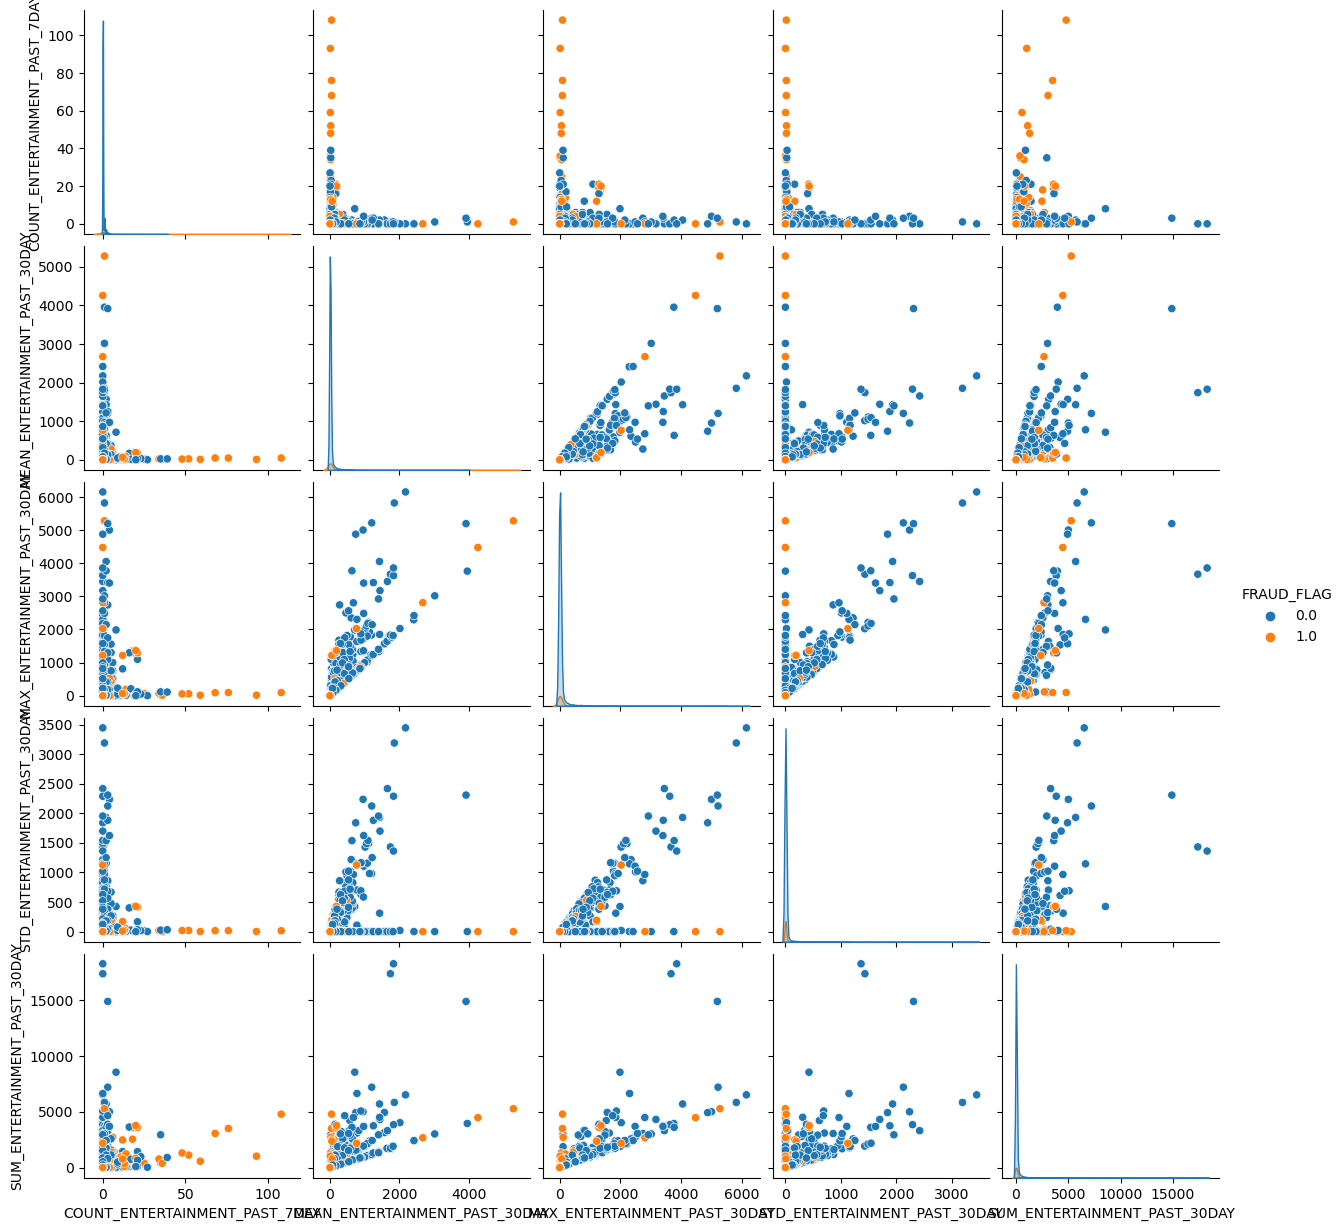

In [753]:
sns.pairplot(train_df[entertainment_columns[1:] + ["FRAUD_FLAG"]], hue="FRAUD_FLAG")
plt.show()

In [754]:
train_df[entertainment_columns[1:]].corr()

,COUNT_ENTERTAINMENT_PAST_7DAY,MEAN_ENTERTAINMENT_PAST_30DAY,MAX_ENTERTAINMENT_PAST_30DAY,STD_ENTERTAINMENT_PAST_30DAY,SUM_ENTERTAINMENT_PAST_30DAY
COUNT_ENTERTAINMENT_PAST_7DAY,1.000000,0.030899,0.077558,0.060046,0.225213
MEAN_ENTERTAINMENT_PAST_30DAY,0.030899,1.000000,0.856933,0.518614,0.699636
MAX_ENTERTAINMENT_PAST_30DAY,0.077558,0.856933,1.000000,0.836937,0.837020
STD_ENTERTAINMENT_PAST_30DAY,0.060046,0.518614,0.836937,1.000000,0.703245
SUM_ENTERTAINMENT_PAST_30DAY,0.225213,0.699636,0.837020,0.703245,1.000000


In [755]:
train_df.drop(["MAX_ENTERTAINMENT_PAST_30DAY", "SUM_ENTERTAINMENT_PAST_30DAY"], axis=1, inplace=True)
test_df.drop(["MAX_ENTERTAINMENT_PAST_30DAY", "SUM_ENTERTAINMENT_PAST_30DAY"], axis=1, inplace=True)

In [756]:
entertainment_columns_new = [col for col in entertainment_columns if col not in ["MAX_ENTERTAINMENT_PAST_30DAY", "SUM_ENTERTAINMENT_PAST_30DAY"]]

In [757]:
train_df["FLAG_ENTERTAINMENT"] = train_df["FLAG_ENTERTAINMENT"].astype("category")
test_df["FLAG_ENTERTAINMENT"] = test_df["FLAG_ENTERTAINMENT"].astype("category")

### **gift_card_columns**

In [758]:
train_df[gift_card_columns[1:]].corr()

,MEAN_GIFT_CARD_PAST_7DAY,MEAN_GIFT_CARD_PAST_30DAY,STD_GIFT_CARD_PAST_30DAY,SUM_GIFT_CARD_PAST_30DAY,COUNT_GIFT_CARD_PAST_30DAY
MEAN_GIFT_CARD_PAST_7DAY,1.000000,0.662788,0.503649,0.701599,0.128357
MEAN_GIFT_CARD_PAST_30DAY,0.662788,1.000000,0.621218,0.737703,0.113953
STD_GIFT_CARD_PAST_30DAY,0.503649,0.621218,1.000000,0.518261,0.215311
SUM_GIFT_CARD_PAST_30DAY,0.701599,0.737703,0.518261,1.000000,0.189074
COUNT_GIFT_CARD_PAST_30DAY,0.128357,0.113953,0.215311,0.189074,1.000000


In [759]:
gift_card_columns_new = [col for col in gift_card_columns if col not in ["SUM_GIFT_CARD_PAST_30DAY"]]

In [760]:
train_df[gift_card_columns_new[1:]].corr()

,MEAN_GIFT_CARD_PAST_7DAY,MEAN_GIFT_CARD_PAST_30DAY,STD_GIFT_CARD_PAST_30DAY,COUNT_GIFT_CARD_PAST_30DAY
MEAN_GIFT_CARD_PAST_7DAY,1.000000,0.662788,0.503649,0.128357
MEAN_GIFT_CARD_PAST_30DAY,0.662788,1.000000,0.621218,0.113953
STD_GIFT_CARD_PAST_30DAY,0.503649,0.621218,1.000000,0.215311
COUNT_GIFT_CARD_PAST_30DAY,0.128357,0.113953,0.215311,1.000000


In [761]:
train_df["gift_card_mean7_mean30_ratio"] = train_df["MEAN_GIFT_CARD_PAST_7DAY"] / train_df["MEAN_GIFT_CARD_PAST_30DAY"]
train_df["gift_card_mean7_mean30_ratio"] = train_df["gift_card_mean7_mean30_ratio"].fillna(0)

test_df["gift_card_mean7_mean30_ratio"] = test_df["MEAN_GIFT_CARD_PAST_7DAY"] / test_df["MEAN_GIFT_CARD_PAST_30DAY"]
test_df["gift_card_mean7_mean30_ratio"] = test_df["gift_card_mean7_mean30_ratio"].fillna(0)

In [762]:
train_df[gift_card_columns_new + ["gift_card_mean7_mean30_ratio"]].corr()

,FLAG_GIFT_CARD,MEAN_GIFT_CARD_PAST_7DAY,MEAN_GIFT_CARD_PAST_30DAY,STD_GIFT_CARD_PAST_30DAY,COUNT_GIFT_CARD_PAST_30DAY,gift_card_mean7_mean30_ratio
FLAG_GIFT_CARD,1.000000,0.024110,0.001060,-0.002401,0.023081,0.035505
MEAN_GIFT_CARD_PAST_7DAY,0.024110,1.000000,0.662788,0.503649,0.128357,0.369614
MEAN_GIFT_CARD_PAST_30DAY,0.001060,0.662788,1.000000,0.621218,0.113953,0.099558
STD_GIFT_CARD_PAST_30DAY,-0.002401,0.503649,0.621218,1.000000,0.215311,0.154989
COUNT_GIFT_CARD_PAST_30DAY,0.023081,0.128357,0.113953,0.215311,1.000000,0.386605
gift_card_mean7_mean30_ratio,0.035505,0.369614,0.099558,0.154989,0.386605,1.000000


In [763]:
new_gift_card_ratio_vars = ["gift_card_mean7_mean30_ratio"]

In [764]:
train_df[gift_card_columns_new[1:] + new_gift_card_ratio_vars].corr()

,MEAN_GIFT_CARD_PAST_7DAY,MEAN_GIFT_CARD_PAST_30DAY,STD_GIFT_CARD_PAST_30DAY,COUNT_GIFT_CARD_PAST_30DAY,gift_card_mean7_mean30_ratio
MEAN_GIFT_CARD_PAST_7DAY,1.000000,0.662788,0.503649,0.128357,0.369614
MEAN_GIFT_CARD_PAST_30DAY,0.662788,1.000000,0.621218,0.113953,0.099558
STD_GIFT_CARD_PAST_30DAY,0.503649,0.621218,1.000000,0.215311,0.154989
COUNT_GIFT_CARD_PAST_30DAY,0.128357,0.113953,0.215311,1.000000,0.386605
gift_card_mean7_mean30_ratio,0.369614,0.099558,0.154989,0.386605,1.000000


In [765]:
train_df["FLAG_GIFT_CARD"] = train_df["FLAG_GIFT_CARD"].astype("category")
test_df["FLAG_GIFT_CARD"] = test_df["FLAG_GIFT_CARD"].astype("category")

### **fastfood_columns**

In [766]:
train_df[fastfood_columns[1:]].corr()

,MEAN_FASTFOOD_PAST_7DAY,STD_FASTFOOD_PAST_7DAY,MAX_FASTFOOD_PAST_30DAY,SUM_FASTFOOD_PAST_30DAY,COUNT_FASTFOOD_PAST_30DAY
MEAN_FASTFOOD_PAST_7DAY,1.000000,0.337194,0.326603,0.395800,0.224918
STD_FASTFOOD_PAST_7DAY,0.337194,1.000000,0.151164,0.357798,0.378639
MAX_FASTFOOD_PAST_30DAY,0.326603,0.151164,1.000000,0.810057,0.160781
SUM_FASTFOOD_PAST_30DAY,0.395800,0.357798,0.810057,1.000000,0.641419
COUNT_FASTFOOD_PAST_30DAY,0.224918,0.378639,0.160781,0.641419,1.000000


In [767]:
fastfood_columns_new = [col for col in fastfood_columns if col != "MAX_FASTFOOD_PAST_30DAY"]
fastfood_columns_new

['FLAG_FASTFOOD',
 'MEAN_FASTFOOD_PAST_7DAY',
 'STD_FASTFOOD_PAST_7DAY',
 'SUM_FASTFOOD_PAST_30DAY',
 'COUNT_FASTFOOD_PAST_30DAY']

In [768]:
train_df["fastfood_sum30_count30"] = train_df["SUM_FASTFOOD_PAST_30DAY"] * train_df["COUNT_FASTFOOD_PAST_30DAY"]

test_df["fastfood_sum30_count30"] = test_df["SUM_FASTFOOD_PAST_30DAY"] * test_df["COUNT_FASTFOOD_PAST_30DAY"]

In [769]:
new_fastfood_ratio_vars = ["fastfood_sum30_count30"]

In [770]:
train_df[fastfood_columns_new[1:] + new_fastfood_ratio_vars].corr()

,MEAN_FASTFOOD_PAST_7DAY,STD_FASTFOOD_PAST_7DAY,SUM_FASTFOOD_PAST_30DAY,COUNT_FASTFOOD_PAST_30DAY,fastfood_sum30_count30
MEAN_FASTFOOD_PAST_7DAY,1.000000,0.337194,0.395800,0.224918,0.163686
STD_FASTFOOD_PAST_7DAY,0.337194,1.000000,0.357798,0.378639,0.300432
SUM_FASTFOOD_PAST_30DAY,0.395800,0.357798,1.000000,0.641419,0.647314
COUNT_FASTFOOD_PAST_30DAY,0.224918,0.378639,0.641419,1.000000,0.840793
fastfood_sum30_count30,0.163686,0.300432,0.647314,0.840793,1.000000


the new ratio column has a strong correlation with the other columns. so, we drop it!

In [771]:
train_df.drop("fastfood_sum30_count30", axis=1, inplace=True)

test_df.drop("fastfood_sum30_count30", axis=1, inplace=True)

In [772]:
train_df["FLAG_FASTFOOD"] = train_df["FLAG_FASTFOOD"].astype("category")

test_df["FLAG_FASTFOOD"] = test_df["FLAG_FASTFOOD"].astype("category")

### **gas_columns**

In [773]:
train_df[gas_columns[1:]].corr()

,SUM_GAS_PAST_7DAY,COUNT_GAS_PAST_7DAY,SUM_GAS_PAST_30DAY,COUNT_GAS_PAST_30DAY
SUM_GAS_PAST_7DAY,1.000000,0.307289,0.718678,0.239211
COUNT_GAS_PAST_7DAY,0.307289,1.000000,0.389894,0.778773
SUM_GAS_PAST_30DAY,0.718678,0.389894,1.000000,0.481938
COUNT_GAS_PAST_30DAY,0.239211,0.778773,0.481938,1.000000


In [774]:
train_df["gas_sum7_count7_ratio"] = train_df["SUM_GAS_PAST_7DAY"] * train_df["COUNT_GAS_PAST_7DAY"]
train_df["gas_sum30_count30_ratio"] = train_df["SUM_GAS_PAST_30DAY"] * train_df["COUNT_GAS_PAST_30DAY"]

test_df["gas_sum7_count7_ratio"] = test_df["SUM_GAS_PAST_7DAY"] * test_df["COUNT_GAS_PAST_7DAY"]
test_df["gas_sum30_count30_ratio"] = test_df["SUM_GAS_PAST_30DAY"] * test_df["COUNT_GAS_PAST_30DAY"]

Big news from the gas category! We've been busy crossing columns and birthing two shiny new ratios. It's like we've stirred up some data magic.

And now, it's time for a bit of housekeeping. Since we've got these fabulous new ratios strutting their stuff, we're giving a nod to efficiency and waving goodbye to the originals

In [775]:
train_df.drop(gas_columns[1:], inplace=True, axis=1)
test_df.drop(gas_columns[1:], inplace=True, axis=1)

In [776]:
gas_columns_new = ["FLAG_GAS", "gas_sum7_count7_ratio", "gas_sum30_count30_ratio"]

In [777]:
train_df[gas_columns_new[1:]].corr()

,gas_sum7_count7_ratio,gas_sum30_count30_ratio
gas_sum7_count7_ratio,1.000000,0.501436
gas_sum30_count30_ratio,0.501436,1.000000


In [778]:
train_df["FLAG_GAS"] = train_df["FLAG_GAS"].astype("category")
test_df["FLAG_GAS"] = test_df["FLAG_GAS"].astype("category")

### **high_amt_columns**

In [779]:
train_df[high_amt_columns[1:]].corr()

,MEAN_HIGH_AMT_PAST_7DAY,MAX_HIGH_AMT_PAST_7DAY,STD_HIGH_AMT_PAST_7DAY,SUM_HIGH_AMT_PAST_7DAY,COUNT_HIGH_AMT_PAST_7DAY,MEAN_HIGH_AMT_PAST_30DAY,SUM_HIGH_AMT_PAST_30DAY,COUNT_HIGH_AMT_PAST_30DAY
MEAN_HIGH_AMT_PAST_7DAY,1.000000,0.876969,0.528269,0.649841,0.224145,0.690431,0.521120,0.219261
MAX_HIGH_AMT_PAST_7DAY,0.876969,1.000000,0.821384,0.735357,0.371517,0.602350,0.566699,0.327986
STD_HIGH_AMT_PAST_7DAY,0.528269,0.821384,1.000000,0.619757,0.318538,0.360800,0.446774,0.278597
SUM_HIGH_AMT_PAST_7DAY,0.649841,0.735357,0.619757,1.000000,0.525887,0.541153,0.815442,0.409056
COUNT_HIGH_AMT_PAST_7DAY,0.224145,0.371517,0.318538,0.525887,1.000000,0.172132,0.506533,0.743732
MEAN_HIGH_AMT_PAST_30DAY,0.690431,0.602350,0.360800,0.541153,0.172132,1.000000,0.606476,0.210460
SUM_HIGH_AMT_PAST_30DAY,0.521120,0.566699,0.446774,0.815442,0.506533,0.606476,1.000000,0.643590
COUNT_HIGH_AMT_PAST_30DAY,0.219261,0.327986,0.278597,0.409056,0.743732,0.210460,0.643590,1.000000


In [780]:
train_df["high_amt_sum30_count30_ratio"] = train_df["SUM_HIGH_AMT_PAST_30DAY"] * train_df["COUNT_HIGH_AMT_PAST_30DAY"]
train_df.drop(["SUM_HIGH_AMT_PAST_30DAY", "COUNT_HIGH_AMT_PAST_30DAY"], inplace=True, axis=1)
train_df.drop(["MAX_HIGH_AMT_PAST_7DAY", "SUM_HIGH_AMT_PAST_7DAY", "COUNT_HIGH_AMT_PAST_7DAY"], inplace=True, axis=1)

test_df["high_amt_sum30_count30_ratio"] = test_df["SUM_HIGH_AMT_PAST_30DAY"] * test_df["COUNT_HIGH_AMT_PAST_30DAY"]
test_df.drop(["SUM_HIGH_AMT_PAST_30DAY", "COUNT_HIGH_AMT_PAST_30DAY"], inplace=True, axis=1)
test_df.drop(["MAX_HIGH_AMT_PAST_7DAY", "SUM_HIGH_AMT_PAST_7DAY", "COUNT_HIGH_AMT_PAST_7DAY"], inplace=True, axis=1)

In [781]:
high_amt_columns_new = ["FLAG_HIGH_AMT", "MEAN_HIGH_AMT_PAST_7DAY", "STD_HIGH_AMT_PAST_7DAY", "high_amt_sum30_count30_ratio"]

In [782]:
train_df[high_amt_columns_new[1:]].corr()

,MEAN_HIGH_AMT_PAST_7DAY,STD_HIGH_AMT_PAST_7DAY,high_amt_sum30_count30_ratio
MEAN_HIGH_AMT_PAST_7DAY,1.000000,0.528269,0.136656
STD_HIGH_AMT_PAST_7DAY,0.528269,1.000000,0.131995
high_amt_sum30_count30_ratio,0.136656,0.131995,1.000000


In [783]:
train_df["FLAG_HIGH_AMT"] = train_df["FLAG_HIGH_AMT"].astype("category")

test_df["FLAG_HIGH_AMT"] = test_df["FLAG_HIGH_AMT"].astype("category")

### **high_recrea_columns**

In [784]:
train_df[high_recrea_columns[1:]].corr()

,MEAN_HIGH_RECREA_PAST_7DAY,MAX_HIGH_RECREA_PAST_7DAY,MAX_HIGH_RECREA_PAST_30DAY,STD_HIGH_RECREA_PAST_30DAY,SUM_HIGH_RECREA_PAST_30DAY
MEAN_HIGH_RECREA_PAST_7DAY,1.000000,0.899107,0.545414,0.416570,0.707569
MAX_HIGH_RECREA_PAST_7DAY,0.899107,1.000000,0.614876,0.504730,0.665403
MAX_HIGH_RECREA_PAST_30DAY,0.545414,0.614876,1.000000,0.903442,0.656770
STD_HIGH_RECREA_PAST_30DAY,0.416570,0.504730,0.903442,1.000000,0.490235
SUM_HIGH_RECREA_PAST_30DAY,0.707569,0.665403,0.656770,0.490235,1.000000


In [785]:
high_recrea_columns_new = [col for col in high_recrea_columns if col not in ["MEAN_HIGH_RECREA_PAST_7DAY", "MAX_HIGH_RECREA_PAST_30DAY"]]

In [786]:
train_df.drop( ["MEAN_HIGH_RECREA_PAST_7DAY", "MAX_HIGH_RECREA_PAST_30DAY"], axis=1, inplace=True)

test_df.drop( ["MEAN_HIGH_RECREA_PAST_7DAY", "MAX_HIGH_RECREA_PAST_30DAY"], axis=1, inplace=True)

In [787]:
train_df["FLAG_HIGH_RECREA"] = train_df["FLAG_HIGH_RECREA"].astype("category")

test_df["FLAG_HIGH_RECREA"] = test_df["FLAG_HIGH_RECREA"].astype("category")

### **recrea_columns**

In [788]:
train_df[recrea_columns[1:]].corr()

,MEAN_RECREA_PAST_7DAY,MAX_RECREA_PAST_7DAY,SUM_RECREA_PAST_7DAY,MEAN_RECREA_PAST_30DAY,STD_RECREA_PAST_30DAY,SUM_RECREA_PAST_30DAY,COUNT_RECREA_PAST_30DAY
MEAN_RECREA_PAST_7DAY,1.000000,0.806683,0.649087,0.776924,0.534808,0.623791,0.005146
MAX_RECREA_PAST_7DAY,0.806683,1.000000,0.757891,0.598720,0.606768,0.649968,0.114677
SUM_RECREA_PAST_7DAY,0.649087,0.757891,1.000000,0.603102,0.470313,0.845448,0.159868
MEAN_RECREA_PAST_30DAY,0.776924,0.598720,0.603102,1.000000,0.615954,0.683637,-0.011242
STD_RECREA_PAST_30DAY,0.534808,0.606768,0.470313,0.615954,1.000000,0.653939,0.056584
SUM_RECREA_PAST_30DAY,0.623791,0.649968,0.845448,0.683637,0.653939,1.000000,0.290140
COUNT_RECREA_PAST_30DAY,0.005146,0.114677,0.159868,-0.011242,0.056584,0.290140,1.000000


In [789]:
train_df["recrea_mean30_count_30_ratio"] = train_df["MEAN_RECREA_PAST_30DAY"] * train_df["COUNT_RECREA_PAST_30DAY"]

test_df["recrea_mean30_count_30_ratio"] = test_df["MEAN_RECREA_PAST_30DAY"] * test_df["COUNT_RECREA_PAST_30DAY"]

In [790]:
train_df.drop(["MAX_RECREA_PAST_7DAY", "SUM_RECREA_PAST_7DAY", "MEAN_RECREA_PAST_30DAY", "SUM_RECREA_PAST_30DAY", "COUNT_RECREA_PAST_30DAY"],
             inplace=True, axis=1)

test_df.drop(["MAX_RECREA_PAST_7DAY", "SUM_RECREA_PAST_7DAY", "MEAN_RECREA_PAST_30DAY", "SUM_RECREA_PAST_30DAY", "COUNT_RECREA_PAST_30DAY"],
             inplace=True, axis=1)

In [791]:
recrea_columns_new = ["FLAG_RECREA", "MEAN_RECREA_PAST_7DAY", "STD_RECREA_PAST_30DAY", "recrea_mean30_count_30_ratio"]

In [792]:
train_df[recrea_columns_new[1:]].corr()

,MEAN_RECREA_PAST_7DAY,STD_RECREA_PAST_30DAY,recrea_mean30_count_30_ratio
MEAN_RECREA_PAST_7DAY,1.000000,0.534808,0.594321
STD_RECREA_PAST_30DAY,0.534808,1.000000,0.626945
recrea_mean30_count_30_ratio,0.594321,0.626945,1.000000


In [793]:
train_df["FLAG_RECREA"] = train_df["FLAG_RECREA"].astype("category")

test_df["FLAG_RECREA"] = test_df["FLAG_RECREA"].astype("category")

### **internet_columns**

In [794]:
train_df[internet_columns[1:]].corr()

,MEAN_INTERNET_PAST_7DAY,MAX_INTERNET_PAST_7DAY,STD_INTERNET_PAST_7DAY,SUM_INTERNET_PAST_7DAY,COUNT_INTERNET_PAST_7DAY,MEAN_INTERNET_PAST_30DAY,STD_INTERNET_PAST_30DAY,SUM_INTERNET_PAST_30DAY,COUNT_INTERNET_PAST_30DAY
MEAN_INTERNET_PAST_7DAY,1.000000,0.868836,0.489211,0.600632,0.004356,0.873022,0.602095,0.586736,0.009652
MAX_INTERNET_PAST_7DAY,0.868836,1.000000,0.789314,0.697063,0.103024,0.744604,0.668384,0.617766,0.106127
STD_INTERNET_PAST_7DAY,0.489211,0.789314,1.000000,0.599551,0.046764,0.419192,0.575305,0.486552,0.058030
SUM_INTERNET_PAST_7DAY,0.600632,0.697063,0.599551,1.000000,0.241221,0.609758,0.446231,0.886395,0.199337
COUNT_INTERNET_PAST_7DAY,0.004356,0.103024,0.046764,0.241221,1.000000,-0.007539,0.011414,0.149607,0.683617
MEAN_INTERNET_PAST_30DAY,0.873022,0.744604,0.419192,0.609758,-0.007539,1.000000,0.698736,0.640112,-0.003202
STD_INTERNET_PAST_30DAY,0.602095,0.668384,0.575305,0.446231,0.011414,0.698736,1.000000,0.512679,0.032443
SUM_INTERNET_PAST_30DAY,0.586736,0.617766,0.486552,0.886395,0.149607,0.640112,0.512679,1.000000,0.231766
COUNT_INTERNET_PAST_30DAY,0.009652,0.106127,0.058030,0.199337,0.683617,-0.003202,0.032443,0.231766,1.000000


In [795]:
internet_columns_new = ["FLAG_INTERNET", "STD_INTERNET_PAST_7DAY", "COUNT_INTERNET_PAST_7DAY",
                        "STD_INTERNET_PAST_30DAY", "SUM_INTERNET_PAST_30DAY"]

In [796]:
cols_to_drop = [col for col in internet_columns if col not in internet_columns_new]
train_df.drop(cols_to_drop, axis=1, inplace=True)

In [797]:
test_df.drop(cols_to_drop, axis=1, inplace=True)

In [798]:
train_df[internet_columns_new[1:]].corr()

,STD_INTERNET_PAST_7DAY,COUNT_INTERNET_PAST_7DAY,STD_INTERNET_PAST_30DAY,SUM_INTERNET_PAST_30DAY
STD_INTERNET_PAST_7DAY,1.000000,0.046764,0.575305,0.486552
COUNT_INTERNET_PAST_7DAY,0.046764,1.000000,0.011414,0.149607
STD_INTERNET_PAST_30DAY,0.575305,0.011414,1.000000,0.512679
SUM_INTERNET_PAST_30DAY,0.486552,0.149607,0.512679,1.000000


In [799]:
train_df["FLAG_INTERNET"] = train_df["FLAG_INTERNET"].astype("category")

test_df["FLAG_INTERNET"] = test_df["FLAG_INTERNET"].astype("category")

### **international_columns**

In [800]:
train_df[international_columns[1:]].corr()

,MEAN_INTERNATIONAL_PAST_7DAY,SUM_INTERNATIONAL_PAST_7DAY,SUM_INTERNATIONAL_PAST_30DAY
MEAN_INTERNATIONAL_PAST_7DAY,1.000000,0.726548,0.696517
SUM_INTERNATIONAL_PAST_7DAY,0.726548,1.000000,0.792070
SUM_INTERNATIONAL_PAST_30DAY,0.696517,0.792070,1.000000


In [801]:
international_columns_new = ["FLAG_INTERNATIONAL", "MEAN_INTERNATIONAL_PAST_7DAY"]

In [802]:
train_df.drop(["SUM_INTERNATIONAL_PAST_7DAY", "SUM_INTERNATIONAL_PAST_30DAY"], axis=1, inplace=True)

test_df.drop(["SUM_INTERNATIONAL_PAST_7DAY", "SUM_INTERNATIONAL_PAST_30DAY"], axis=1, inplace=True)

In [803]:
train_df["FLAG_INTERNATIONAL"] = train_df["FLAG_INTERNATIONAL"].astype("category")

test_df["FLAG_INTERNATIONAL"] = test_df["FLAG_INTERNATIONAL"].astype("category")

### **fashion_columns**

In [804]:
fashion_columns

['FLAG_FASHION', 'MEAN_FASHION_PAST_7DAY']

We'll keep them

### **low_amt_columns**

In [805]:
train_df[low_amt_columns[1:]].corr()

,MEAN_LOW_AMT_PAST_7DAY,STD_LOW_AMT_PAST_7DAY,SUM_LOW_AMT_PAST_7DAY,COUNT_LOW_AMT_PAST_7DAY,MEAN_LOW_AMT_PAST_30DAY,STD_LOW_AMT_PAST_30DAY,SUM_LOW_AMT_PAST_30DAY,COUNT_LOW_AMT_PAST_30DAY
MEAN_LOW_AMT_PAST_7DAY,1.000000,0.519595,0.244913,0.135729,0.623999,0.460757,0.238170,0.222706
STD_LOW_AMT_PAST_7DAY,0.519595,1.000000,0.183651,0.153103,0.300891,0.558886,0.194812,0.247017
SUM_LOW_AMT_PAST_7DAY,0.244913,0.183651,1.000000,0.688007,0.178494,0.109671,0.526671,0.493356
COUNT_LOW_AMT_PAST_7DAY,0.135729,0.153103,0.688007,1.000000,0.080262,0.079749,0.369064,0.638112
MEAN_LOW_AMT_PAST_30DAY,0.623999,0.300891,0.178494,0.080262,1.000000,0.505924,0.216128,0.163587
STD_LOW_AMT_PAST_30DAY,0.460757,0.558886,0.109671,0.079749,0.505924,1.000000,0.153951,0.187774
SUM_LOW_AMT_PAST_30DAY,0.238170,0.194812,0.526671,0.369064,0.216128,0.153951,1.000000,0.824924
COUNT_LOW_AMT_PAST_30DAY,0.222706,0.247017,0.493356,0.638112,0.163587,0.187774,0.824924,1.000000


In [806]:
train_df.drop(["COUNT_LOW_AMT_PAST_7DAY", "COUNT_LOW_AMT_PAST_30DAY"], inplace=True, axis=1)

test_df.drop(["COUNT_LOW_AMT_PAST_7DAY", "COUNT_LOW_AMT_PAST_30DAY"], inplace=True, axis=1)

In [807]:
low_amt_columns_new = [col for col in low_amt_columns if col not in ["COUNT_LOW_AMT_PAST_7DAY", "COUNT_LOW_AMT_PAST_30DAY"]]

In [808]:
train_df[low_amt_columns_new[1:]].corr()

,MEAN_LOW_AMT_PAST_7DAY,STD_LOW_AMT_PAST_7DAY,SUM_LOW_AMT_PAST_7DAY,MEAN_LOW_AMT_PAST_30DAY,STD_LOW_AMT_PAST_30DAY,SUM_LOW_AMT_PAST_30DAY
MEAN_LOW_AMT_PAST_7DAY,1.000000,0.519595,0.244913,0.623999,0.460757,0.238170
STD_LOW_AMT_PAST_7DAY,0.519595,1.000000,0.183651,0.300891,0.558886,0.194812
SUM_LOW_AMT_PAST_7DAY,0.244913,0.183651,1.000000,0.178494,0.109671,0.526671
MEAN_LOW_AMT_PAST_30DAY,0.623999,0.300891,0.178494,1.000000,0.505924,0.216128
STD_LOW_AMT_PAST_30DAY,0.460757,0.558886,0.109671,0.505924,1.000000,0.153951
SUM_LOW_AMT_PAST_30DAY,0.238170,0.194812,0.526671,0.216128,0.153951,1.000000


In [809]:
train_df["FLAG_LOW_AMT"] = train_df["FLAG_LOW_AMT"].astype("category")

test_df["FLAG_LOW_AMT"] = test_df["FLAG_LOW_AMT"].astype("category")

### **manual_columns**

In [810]:
train_df[manual_columns[1:]].corr()

,MEAN_MANUAL_ENTRY_PAST_7DAY,SUM_MANUAL_ENTRY_PAST_7DAY,COUNT_MANUAL_ENTRY_PAST_7DAY,MEAN_MANUAL_ENTRY_PAST_30DAY,MAX_MANUAL_ENTRY_PAST_30DAY,STD_MANUAL_ENTRY_PAST_30DAY,SUM_MANUAL_ENTRY_PAST_30DAY,COUNT_MANUAL_ENTRY_PAST_30DAY
MEAN_MANUAL_ENTRY_PAST_7DAY,1.000000,0.805392,0.110513,0.462812,0.471335,0.461603,0.442053,0.095675
SUM_MANUAL_ENTRY_PAST_7DAY,0.805392,1.000000,0.354878,0.392714,0.520691,0.463311,0.616835,0.274084
COUNT_MANUAL_ENTRY_PAST_7DAY,0.110513,0.354878,1.000000,0.060733,0.160039,0.107278,0.357925,0.891434
MEAN_MANUAL_ENTRY_PAST_30DAY,0.462812,0.392714,0.060733,1.000000,0.728862,0.704233,0.568867,0.070761
MAX_MANUAL_ENTRY_PAST_30DAY,0.471335,0.520691,0.160039,0.728862,1.000000,0.932067,0.784692,0.188626
STD_MANUAL_ENTRY_PAST_30DAY,0.461603,0.463311,0.107278,0.704233,0.932067,1.000000,0.698333,0.129698
SUM_MANUAL_ENTRY_PAST_30DAY,0.442053,0.616835,0.357925,0.568867,0.784692,0.698333,1.000000,0.414923
COUNT_MANUAL_ENTRY_PAST_30DAY,0.095675,0.274084,0.891434,0.070761,0.188626,0.129698,0.414923,1.000000


In [811]:
train_df[["MEAN_MANUAL_ENTRY_PAST_7DAY", "COUNT_MANUAL_ENTRY_PAST_7DAY", "MEAN_MANUAL_ENTRY_PAST_30DAY", "SUM_MANUAL_ENTRY_PAST_30DAY"]].corr()

,MEAN_MANUAL_ENTRY_PAST_7DAY,COUNT_MANUAL_ENTRY_PAST_7DAY,MEAN_MANUAL_ENTRY_PAST_30DAY,SUM_MANUAL_ENTRY_PAST_30DAY
MEAN_MANUAL_ENTRY_PAST_7DAY,1.000000,0.110513,0.462812,0.442053
COUNT_MANUAL_ENTRY_PAST_7DAY,0.110513,1.000000,0.060733,0.357925
MEAN_MANUAL_ENTRY_PAST_30DAY,0.462812,0.060733,1.000000,0.568867
SUM_MANUAL_ENTRY_PAST_30DAY,0.442053,0.357925,0.568867,1.000000


In [812]:
manual_columns_new = ["FLAG_MANUAL_ENTRY", "MEAN_MANUAL_ENTRY_PAST_7DAY", "COUNT_MANUAL_ENTRY_PAST_7DAY", 
                      "MEAN_MANUAL_ENTRY_PAST_30DAY", "SUM_MANUAL_ENTRY_PAST_30DAY"]

In [813]:
cols_to_drop = [col for col in manual_columns if col not in manual_columns_new]

train_df.drop(cols_to_drop, axis=1, inplace=True)

test_df.drop(cols_to_drop, axis=1, inplace=True)

In [814]:
train_df["FLAG_MANUAL_ENTRY"] = train_df["FLAG_MANUAL_ENTRY"].astype("category")

test_df["FLAG_MANUAL_ENTRY"] = test_df["FLAG_MANUAL_ENTRY"].astype("category")

### **elctrncs_columns**

In [815]:
train_df[elctrncs_columns].corr()

,FLAG_ELCTRNCS,MEAN_ELCTRNCS_PAST_7DAY,SUM_ELCTRNCS_PAST_7DAY,MEAN_ELCTRNCS_PAST_30DAY,COUNT_ELCTRNCS_PAST_30DAY
FLAG_ELCTRNCS,1.000000,0.054210,0.059864,0.045125,0.120537
MEAN_ELCTRNCS_PAST_7DAY,0.054210,1.000000,0.743189,0.568539,0.156889
SUM_ELCTRNCS_PAST_7DAY,0.059864,0.743189,1.000000,0.432568,0.338520
MEAN_ELCTRNCS_PAST_30DAY,0.045125,0.568539,0.432568,1.000000,0.129855
COUNT_ELCTRNCS_PAST_30DAY,0.120537,0.156889,0.338520,0.129855,1.000000


In [816]:
electrncs_columns_new = [col for col in elctrncs_columns if col not in ["SUM_ELCTRNCS_PAST_7DAY"]]

In [817]:
train_df.drop(["SUM_ELCTRNCS_PAST_7DAY"], inplace=True, axis=1)

test_df.drop(["SUM_ELCTRNCS_PAST_7DAY"], inplace=True, axis=1)

In [818]:
train_df["FLAG_ELCTRNCS"] = train_df["FLAG_ELCTRNCS"].astype("category")

test_df["FLAG_ELCTRNCS"] = test_df["FLAG_ELCTRNCS"].astype("category")

### **swipe_columns**

In [819]:
train_df[swipe_columns[1:]].corr()

,MEAN_SWIPE_PAST_7DAY,MAX_SWIPE_PAST_7DAY,STD_SWIPE_PAST_7DAY,SUM_SWIPE_PAST_7DAY,COUNT_SWIPE_PAST_7DAY,MEAN_SWIPE_PAST_30DAY,STD_SWIPE_PAST_30DAY,SUM_SWIPE_PAST_30DAY,COUNT_SWIPE_PAST_30DAY
MEAN_SWIPE_PAST_7DAY,1.000000,0.670922,0.419254,0.589965,0.049527,0.709483,0.287966,0.297810,0.041037
MAX_SWIPE_PAST_7DAY,0.670922,1.000000,0.857441,0.837007,0.270067,0.394031,0.456273,0.505231,0.232546
STD_SWIPE_PAST_7DAY,0.419254,0.857441,1.000000,0.670395,0.199334,0.158382,0.495142,0.410370,0.175054
SUM_SWIPE_PAST_7DAY,0.589965,0.837007,0.670395,1.000000,0.478359,0.379914,0.385824,0.656518,0.396341
COUNT_SWIPE_PAST_7DAY,0.049527,0.270067,0.199334,0.478359,1.000000,-0.007171,0.139627,0.600693,0.898858
MEAN_SWIPE_PAST_30DAY,0.709483,0.394031,0.158382,0.379914,-0.007171,1.000000,0.377336,0.312596,-0.009600
STD_SWIPE_PAST_30DAY,0.287966,0.456273,0.495142,0.385824,0.139627,0.377336,1.000000,0.638075,0.155080
SUM_SWIPE_PAST_30DAY,0.297810,0.505231,0.410370,0.656518,0.600693,0.312596,0.638075,1.000000,0.665693
COUNT_SWIPE_PAST_30DAY,0.041037,0.232546,0.175054,0.396341,0.898858,-0.009600,0.155080,0.665693,1.000000


In [820]:
train_df["swipe_sum30_count30_ratio"] = train_df["COUNT_SWIPE_PAST_30DAY"] * train_df["SUM_SWIPE_PAST_30DAY"]

test_df["swipe_sum30_count30_ratio"] = test_df["COUNT_SWIPE_PAST_30DAY"] * test_df["SUM_SWIPE_PAST_30DAY"]

In [821]:
swipe_columns_new = ["FLAG_SWIPE", "MEAN_SWIPE_PAST_7DAY", "STD_SWIPE_PAST_7DAY", "SUM_SWIPE_PAST_7DAY", "swipe_sum30_count30_ratio"]

In [822]:
cols_to_drop = [col for col in swipe_columns if col not in swipe_columns_new]

train_df.drop(cols_to_drop, inplace=True, axis=1)

test_df.drop(cols_to_drop, inplace=True, axis=1)

In [823]:
train_df["FLAG_SWIPE"] = train_df["FLAG_SWIPE"].astype("category")

test_df["FLAG_SWIPE"] = test_df["FLAG_SWIPE"].astype("category")

### **health_columns**

In [824]:
train_df[health_columns[1:]].corr()

,MEAN_HEALTH_PAST_7DAY,STD_HEALTH_PAST_7DAY,COUNT_HEALTH_PAST_7DAY,MEAN_HEALTH_PAST_30DAY,STD_HEALTH_PAST_30DAY,COUNT_HEALTH_PAST_30DAY
MEAN_HEALTH_PAST_7DAY,1.000000,0.502130,0.278331,0.500254,0.339962,0.204180
STD_HEALTH_PAST_7DAY,0.502130,1.000000,0.354293,0.265645,0.453918,0.225184
COUNT_HEALTH_PAST_7DAY,0.278331,0.354293,1.000000,0.139649,0.209793,0.614876
MEAN_HEALTH_PAST_30DAY,0.500254,0.265645,0.139649,1.000000,0.531277,0.195382
STD_HEALTH_PAST_30DAY,0.339962,0.453918,0.209793,0.531277,1.000000,0.319663
COUNT_HEALTH_PAST_30DAY,0.204180,0.225184,0.614876,0.195382,0.319663,1.000000


In [825]:
train_df["health_mean7_count_7_ratio"] = train_df["MEAN_HEALTH_PAST_7DAY"] * train_df["COUNT_HEALTH_PAST_7DAY"]
train_df["health_mean30_count_30_ratio"] = train_df["MEAN_HEALTH_PAST_30DAY"] * train_df["COUNT_HEALTH_PAST_30DAY"]

test_df["health_mean7_count_7_ratio"] = test_df["MEAN_HEALTH_PAST_7DAY"] * test_df["COUNT_HEALTH_PAST_7DAY"]
test_df["health_mean30_count_30_ratio"] = test_df["MEAN_HEALTH_PAST_30DAY"] * test_df["COUNT_HEALTH_PAST_30DAY"]

In [826]:
health_columns_new = ["FLAG_HEALTH", "STD_HEALTH_PAST_7DAY", "STD_HEALTH_PAST_30DAY", "health_mean7_count_7_ratio", "health_mean30_count_30_ratio"]

In [827]:
train_df[health_columns_new[1:]].corr()

,STD_HEALTH_PAST_7DAY,STD_HEALTH_PAST_30DAY,health_mean7_count_7_ratio,health_mean30_count_30_ratio
STD_HEALTH_PAST_7DAY,1.000000,0.453918,0.660054,0.348793
STD_HEALTH_PAST_30DAY,0.453918,1.000000,0.347909,0.694585
health_mean7_count_7_ratio,0.660054,0.347909,1.000000,0.520345
health_mean30_count_30_ratio,0.348793,0.694585,0.520345,1.000000


In [828]:
health_columns_new.remove("STD_HEALTH_PAST_30DAY")

In [829]:
cols_to_drop = [col for col in health_columns if col not in health_columns_new]

train_df.drop(cols_to_drop, inplace=True, axis=1)

test_df.drop(cols_to_drop, inplace=True, axis=1)

In [830]:
train_df["FLAG_HEALTH"] = train_df["FLAG_HEALTH"].astype("category")

test_df["FLAG_HEALTH"] = test_df["FLAG_HEALTH"].astype("category")

### **weekend_columns**

In [831]:
train_df[weekend_columns].corr()

,MEAN_WEEKEND_PAST_7DAY,MAX_WEEKEND_PAST_7DAY,SUM_WEEKEND_PAST_7DAY,COUNT_WEEKEND_PAST_7DAY,MEAN_WEEKEND_PAST_30DAY,MAX_WEEKEND_PAST_30DAY,SUM_WEEKEND_PAST_30DAY,COUNT_WEEKEND_PAST_30DAY
MEAN_WEEKEND_PAST_7DAY,1.000000,0.844134,0.600518,0.036262,0.407068,0.452013,0.390468,0.045403
MAX_WEEKEND_PAST_7DAY,0.844134,1.000000,0.796300,0.220003,0.305871,0.527158,0.507638,0.201488
SUM_WEEKEND_PAST_7DAY,0.600518,0.796300,1.000000,0.515237,0.219644,0.418387,0.686406,0.336142
COUNT_WEEKEND_PAST_7DAY,0.036262,0.220003,0.515237,1.000000,0.000394,0.131227,0.358855,0.655758
MEAN_WEEKEND_PAST_30DAY,0.407068,0.305871,0.219644,0.000394,1.000000,0.690606,0.457120,-0.000239
MAX_WEEKEND_PAST_30DAY,0.452013,0.527158,0.418387,0.131227,0.690606,1.000000,0.766063,0.197055
SUM_WEEKEND_PAST_30DAY,0.390468,0.507638,0.686406,0.358855,0.457120,0.766063,1.000000,0.453036
COUNT_WEEKEND_PAST_30DAY,0.045403,0.201488,0.336142,0.655758,-0.000239,0.197055,0.453036,1.000000


In [832]:
weekend_columns_new = ["MEAN_WEEKEND_PAST_7DAY", "SUM_WEEKEND_PAST_7DAY", "COUNT_WEEKEND_PAST_7DAY", "MEAN_WEEKEND_PAST_30DAY", 
                       "SUM_WEEKEND_PAST_30DAY", "COUNT_WEEKEND_PAST_30DAY"]

In [833]:
train_df[weekend_columns_new].corr()

,MEAN_WEEKEND_PAST_7DAY,SUM_WEEKEND_PAST_7DAY,COUNT_WEEKEND_PAST_7DAY,MEAN_WEEKEND_PAST_30DAY,SUM_WEEKEND_PAST_30DAY,COUNT_WEEKEND_PAST_30DAY
MEAN_WEEKEND_PAST_7DAY,1.000000,0.600518,0.036262,0.407068,0.390468,0.045403
SUM_WEEKEND_PAST_7DAY,0.600518,1.000000,0.515237,0.219644,0.686406,0.336142
COUNT_WEEKEND_PAST_7DAY,0.036262,0.515237,1.000000,0.000394,0.358855,0.655758
MEAN_WEEKEND_PAST_30DAY,0.407068,0.219644,0.000394,1.000000,0.457120,-0.000239
SUM_WEEKEND_PAST_30DAY,0.390468,0.686406,0.358855,0.457120,1.000000,0.453036
COUNT_WEEKEND_PAST_30DAY,0.045403,0.336142,0.655758,-0.000239,0.453036,1.000000


In [834]:
cols_to_drop = [col for col in weekend_columns if col not in weekend_columns_new]

train_df.drop(cols_to_drop, inplace=True, axis=1)

test_df.drop(cols_to_drop, inplace=True, axis=1)

### **partial_columns**

In [835]:
train_df[partial_columns].corr()

,SUM_PARTIAL_PAST_7DAY,MAX_PARTIAL_PAST_30DAY,STD_PARTIAL_PAST_30DAY
SUM_PARTIAL_PAST_7DAY,1.000000,0.290655,0.043312
MAX_PARTIAL_PAST_30DAY,0.290655,1.000000,0.512614
STD_PARTIAL_PAST_30DAY,0.043312,0.512614,1.000000


# **4. In-Depth Analysis of Merged Features**

## **Dive into the Clickstream: Unveiling Intrigue**

Hold onto your hats – we're entering the captivating world of clickstream data. This is where things get juicy, as we delve into the "other_cols" section, where the clickstream dataset comes to life.

Imagine unraveling the patterns and stories hidden in clicks, swipes, and taps. From CITY to BROWSER_FAMILY, every entry holds secrets waiting to be unveiled.

In [836]:
print(other_cols)

['EVENT_DATETIME', 'FRAUD_FLAG', 'AVAIL_CRDT', 'AMOUNT', 'CREDIT_LIMIT', 'CARD_NOT_PRESENT', 'TIMESTAMP_MIN', 'TIMESTAMP_MAX', 'PAGE_NAME', 'BROWSER_FAMILY', 'OS_FAMILY', 'DEVICE_FAMILY', 'DEVICE_BRAND', 'DEVICE_MODEL', 'CITY', 'TIME_SPENT']


### **'AVAIL_CRDT', 'AMOUNT', 'CREDIT_LIMIT'**

In [837]:
train_df[['AVAIL_CRDT', 'AMOUNT', 'CREDIT_LIMIT']].corr()

,AVAIL_CRDT,AMOUNT,CREDIT_LIMIT
AVAIL_CRDT,1.000000,0.055768,0.840051
AMOUNT,0.055768,1.000000,0.075691
CREDIT_LIMIT,0.840051,0.075691,1.000000


It's decision time, and we're navigating the terrain of credit-related columns. Here's the scoop: between credit limit and available credit, there's a high correlation. These two seem to dance in sync.

But we're here to make a call, and our hunch leads us to drop the credit limit. Why, you ask? Well, in the world of fraudsters, available credit might hold more allure. So, we're letting the credit limit gracefully bow out, giving available credit the spotlight.

In [838]:
train_df.drop("CREDIT_LIMIT", inplace=True, axis=1)

test_df.drop("CREDIT_LIMIT", inplace=True, axis=1)

In [839]:
train_df.drop(['CARD_NOT_PRESENT', 'TIMESTAMP_MIN', 'TIMESTAMP_MAX'], inplace=True, axis=1)

test_df.drop(['CARD_NOT_PRESENT', 'TIMESTAMP_MIN', 'TIMESTAMP_MAX'], inplace=True, axis=1)

### **Unveiling Time's Secrets: Analyzing EVENT_DATETIME**

Time to turn the spotlight on EVENT_DATETIME – the gateway to exploring the fascinating dance between fraud and the clock. We're rolling up our sleeves to create fresh features that decode the magic of days, hours, and dates.

Imagine this: we're breaking down EVENT_DATETIME to uncover its hidden relationships with fraud. The day of the week, the hour of the day, and even the day of the month – they're all stepping into the limelight.

In [840]:
train_df["EVENT_DATETIME"] = pd.to_datetime(train_df["EVENT_DATETIME"])
train_df["hour_of_day"] = train_df["EVENT_DATETIME"].dt.hour
train_df["day_of_month"] = train_df["EVENT_DATETIME"].dt.day
train_df["day_of_week"] = train_df["EVENT_DATETIME"].dt.dayofweek
train_df.drop("EVENT_DATETIME", axis=1, inplace=True)

test_df["EVENT_DATETIME"] = pd.to_datetime(test_df["EVENT_DATETIME"])
test_df["hour_of_day"] = test_df["EVENT_DATETIME"].dt.hour
test_df["day_of_month"] = test_df["EVENT_DATETIME"].dt.day
test_df["day_of_week"] = test_df["EVENT_DATETIME"].dt.dayofweek
test_df.drop("EVENT_DATETIME", axis=1, inplace=True)

### **day of week**

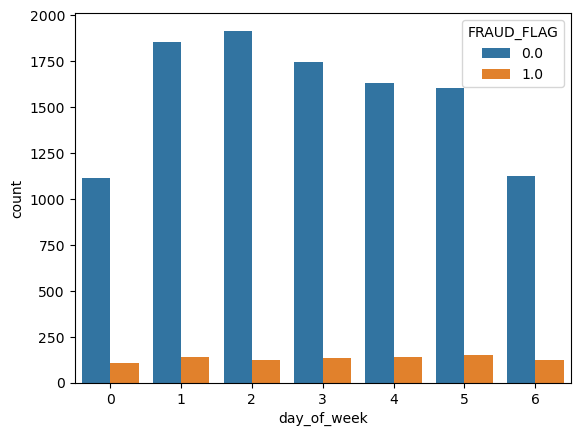

In [841]:
sns.countplot(data=train_df, x="day_of_week", hue="FRAUD_FLAG")
plt.show()

Our journey into time's embrace led us to explore the ebb and flow of frauds and non-frauds across different days of the week. But guess what? The story didn't quite unfold as we expected. No clear patterns emerged from this exploration. So, we're taking a twist in our time tale. We've reimagined the days of the week, categorizing them into the weekdays and weekends.

In [842]:
mapping = {0:0, 1:0, 2:0, 3:0, 4:0, 5:1, 6:1}

train_df["day_of_week_categorized"] = train_df["day_of_week"].map(mapping)

test_df["day_of_week_categorized"] = test_df["day_of_week"].map(mapping)

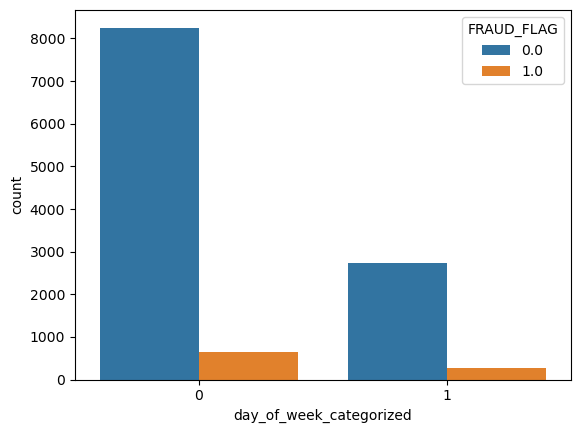

In [843]:
sns.countplot(data=train_df, x="day_of_week_categorized", hue="FRAUD_FLAG")
plt.show()

In [844]:
train_df.drop("day_of_week", inplace=True, axis=1)

test_df.drop("day_of_week", inplace=True, axis=1)

In [845]:
train_df["day_of_week_categorized"] = train_df["day_of_week_categorized"].astype("category")

test_df["day_of_week_categorized"] = test_df["day_of_week_categorized"].astype("category")

### **hour of day**

Our journey through the clock's cycles led us to analyze frauds across different hours of the day. While a subtle pattern danced in the numbers, we faced a crossroads: the path of one-hot encoding, brimming with possibilities but carrying the weight of complexity, or the trail of smart simplification.

And here's the twist: we've chosen simplicity without sacrificing insight. By grouping hours into three eight-hour categories, we've crafted a new variable that whispers tales of fraud activity. The secret? Hours 8 to 15 hold a spotlight, where the pulse of frauds beats stronger compared to the other time bins.

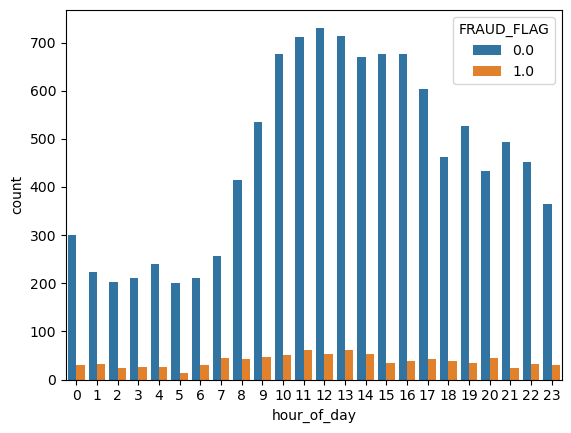

In [846]:
sns.countplot(data=train_df, x="hour_of_day", hue="FRAUD_FLAG")
plt.show()

categorizing the hour of the day to 3 eight-hour categories

In [847]:
train_df["hour_of_day_categorized"] = train_df["hour_of_day"].apply(lambda x: 0 if 0 <= x <= 7 else 1 if 7 < x <= 15 else 2)

test_df["hour_of_day_categorized"] = test_df["hour_of_day"].apply(lambda x: 0 if 0 <= x <= 7 else 1 if 7 < x <= 15 else 2)

In [848]:
train_df["hour_of_day_categorized"].value_counts(normalize=True)

1    0.464757
2    0.361001
0    0.174242
Name: hour_of_day_categorized, dtype: float64

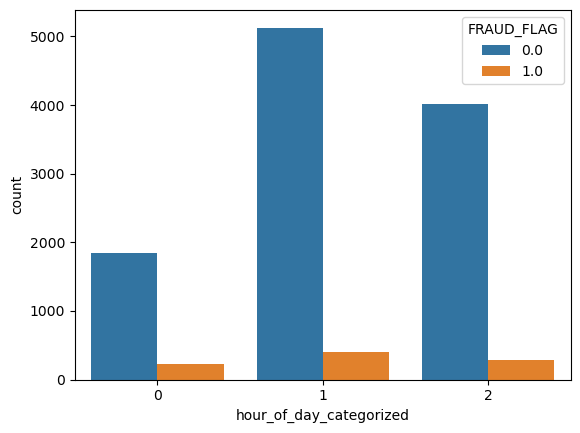

In [849]:
sns.countplot(data=train_df, x="hour_of_day_categorized", hue="FRAUD_FLAG")
plt.show()

In [850]:
train_df[train_df["FRAUD_FLAG"] == 1]["hour_of_day_categorized"].value_counts(normalize=True)

1    0.438998
2    0.312636
0    0.248366
Name: hour_of_day_categorized, dtype: float64

In [851]:
train_df[train_df["FRAUD_FLAG"] == 0]["hour_of_day_categorized"].value_counts(normalize=True)

1    0.466909
2    0.365043
0    0.168047
Name: hour_of_day_categorized, dtype: float64

In [852]:
train_df.drop("hour_of_day", axis=1, inplace=True)

test_df.drop("hour_of_day", axis=1, inplace=True)

applying one-hot encoding

In [853]:
one_hot_encoded_train = pd.get_dummies(train_df["hour_of_day_categorized"])
one_hot_encoded_train.columns = ["hour_of_day_categorized_0", "hour_of_day_categorized_1", "hour_of_day_categorized_2"]

one_hot_encoded_test = pd.get_dummies(test_df["hour_of_day_categorized"])
one_hot_encoded_test.columns = ["hour_of_day_categorized_0", "hour_of_day_categorized_1", "hour_of_day_categorized_2"]

one_hot_encoded_train.head()

,hour_of_day_categorized_0,hour_of_day_categorized_1,hour_of_day_categorized_2
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,0,1


In [854]:
train_df = pd.concat([train_df, one_hot_encoded_train], axis=1)

test_df = pd.concat([test_df, one_hot_encoded_test], axis=1)

In [855]:
train_df.drop("hour_of_day_categorized", axis=1, inplace=True)

test_df.drop("hour_of_day_categorized", axis=1, inplace=True)

### **day_of_month**

Our journey through time's calendar led us to some interesting stops. We first divided the days into three buckets – 0 to 10, 11 to 20, and 21 to 31. But then, we decided to take a different route, merging the buckets into two groups – 0 to 15 and 16 to 31.

As the days unfolded, we closely watched the interplay between fraud and non-fraud cases. But the story wasn't as gripping as we hoped. The day of the month, despite its variations, didn't deliver a significant tale for our short dataset time span.

In the spirit of refining our analysis, we're gracefully bowing out of this chapter. Both the day of the month and the categorized days are taking their exit, leaving the stage for more impactful insights to shine.

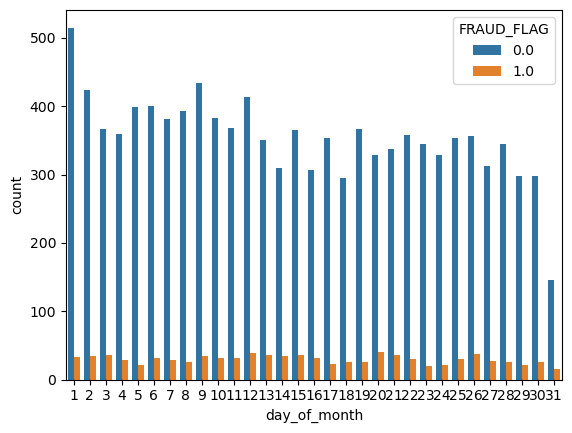

In [856]:
sns.countplot(data=train_df, x="day_of_month", hue="FRAUD_FLAG")
plt.show()

In [857]:
train_df["day_of_month_categorized"] = pd.cut(train_df["day_of_month"], bins=[1, 10, 20, 31], labels=[0, 1, 2])

test_df["day_of_month_categorized"] = pd.cut(test_df["day_of_month"], bins=[1, 10, 20, 31], labels=[0, 1, 2])

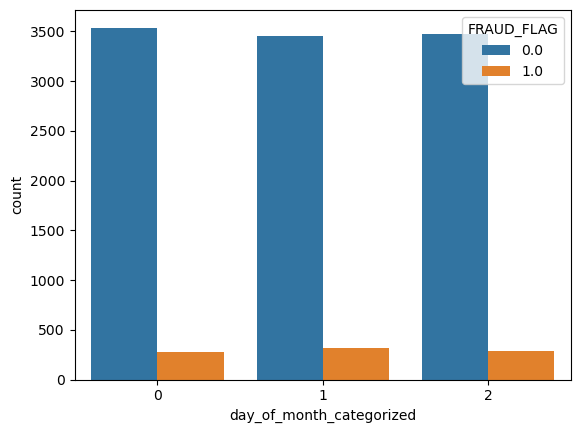

In [858]:
sns.countplot(data=train_df, x="day_of_month_categorized", hue="FRAUD_FLAG")
plt.show()

In [859]:
train_df["day_of_month_categorized"] = pd.cut(train_df["day_of_month"], bins=[1, 15, 31], labels=[0, 1])

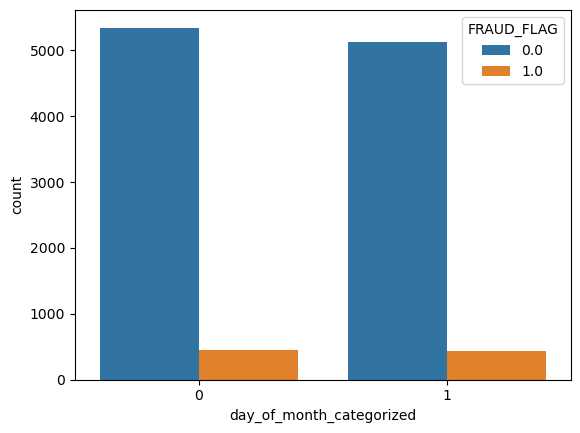

In [860]:
sns.countplot(data=train_df, x="day_of_month_categorized", hue="FRAUD_FLAG")
plt.show()

In [861]:
train_df.drop(["day_of_month", "day_of_month_categorized"], inplace=True, axis=1)

test_df.drop(["day_of_month", "day_of_month_categorized"], inplace=True, axis=1)

### **"PAGE_NAME": A fascinating story**

Hold tight – we're on a mission to bid farewell to those sneaky duplicates that have crept into our combined dataset. The culprits? Special characters and spaces that are wreaking havoc.

Our secret weapon? A good ol' cleaning session. We're stripping away unwanted characters, tidying up spaces, and putting those duplicates on notice.

In [862]:
unique_values = set(",".join(train_df["PAGE_NAME"]).split(","))
unique_values = {s.strip(" '\"{}") for s in unique_values}
unique_values

{'2-factor-authentication',
 'account-settings',
 'add-payment-method',
 'add-shipping-address',
 'add-to-cart',
 'checkout',
 'forgot-password',
 'home-page',
 'order-complete',
 'order-history',
 'payment-failed',
 'search-results',
 'sign-in',
 'sign-up',
 'update-payment-method',
 'update-shipping-address',
 'view-cart',
 'view-product'}

Prepare for a twist in the tale as we dive into the world of client online banking events. We're about to reveal a table that showcases the differences in fraud percentages across various events – a peek into how events and fraud dance together.

Buckle up for surprises: our findings defy the norm. It turns out that the percentage of frauds associated with 2-factor authentication is higher among fraud cases compared to non-frauds. 

But the intrigue doesn't stop there. We're not just bystanders – we're selectors, pinpointing the events where **the gap between frauds and non-frauds is significant**. Armed with a flag column that waves a 0 or 1, we're curating variables that carry the weight of this discrepancy.

In [863]:
fr = (train_df["FRAUD_FLAG"] == 1).sum()
non_fr = (train_df["FRAUD_FLAG"] == 0).sum()

fraud_nums = []
non_fraud_nums = []
page_name = list(unique_values)

for page in unique_values:
    mask = train_df["FRAUD_FLAG"] == 1
    mask &= train_df["PAGE_NAME"].str.contains(page)
    filtered_df = train_df[mask]
    fraud_nums.append(len(filtered_df))
    
    mask = train_df["FRAUD_FLAG"] == 0
    mask &= train_df["PAGE_NAME"].str.contains(page)
    filtered_df = train_df[mask]    
    non_fraud_nums.append(len(filtered_df))
    
fruad_by_page = pd.DataFrame({"fraud #": fraud_nums, "non_fraud #": non_fraud_nums}, index=page_name)
fruad_by_page["fraud %"] =  round(fruad_by_page["fraud #"] / fr *100, 2)
fruad_by_page["non_fraud %"] =  round(fruad_by_page["non_fraud #"] / non_fr * 100, 2)
fruad_by_page

,fraud #,non_fraud #,fraud %,non_fraud %
order-complete,918,10985,100.00,100.00
sign-in,918,10985,100.00,100.00
search-results,880,10284,95.86,93.62
sign-up,279,2095,30.39,19.07
2-factor-authentication,478,4637,52.07,42.21
update-payment-method,346,2025,37.69,18.43
home-page,903,10851,98.37,98.78
order-history,447,4926,48.69,44.84
add-shipping-address,387,2224,42.16,20.25
update-shipping-address,282,1855,30.72,16.89


In [864]:
new_page_vars = ["add-shipping-address" , "add-payment-method", "payment-failed", "update-shipping-address", 
                 "update-payment-method", "forgot-password"]

In [865]:
set_col = "PAGE_NAME"
target_col = "FRAUD_FLAG"
for val in new_page_vars:
    new_column = str(val)
    train_df[new_column] = (train_df[set_col].apply(lambda x: val in x)) 
    train_df[new_column] = train_df[val].astype(int)

for val in new_page_vars:
    new_column = str(val)
    test_df[new_column] = (test_df[set_col].apply(lambda x: val in x)) 
    test_df[new_column] = test_df[val].astype(int)

In [866]:
for col in new_page_vars:
    train_df[col] = train_df[col].astype("category")
    
for col in new_page_vars:
    test_df[col] = test_df[col].astype("category")

In [867]:
train_df.drop("PAGE_NAME", inplace=True, axis=1)

test_df.drop("PAGE_NAME", inplace=True, axis=1)

### **BROWSER_FAMILY**

In [868]:
train_df["BROWSER_FAMILY"].unique()

array(['Mobile Safari', 'Mobile Safari UI/WKWebView', 'Edge', 'Android',
       'Firefox', 'Chrome Mobile', 'Chrome', 'Safari',
       'Chrome Mobile iOS', 'Samsung Internet', 'Google',
       'Chrome Mobile WebView', 'Firefox Mobile', 'Edge Mobile',
       'Apple Mail', 'Amazon Silk', 'Yandex Browser', 'Opera'],
      dtype=object)

In [869]:
train_df[train_df["FRAUD_FLAG"] == 1]["BROWSER_FAMILY"].value_counts(normalize=True)*100

Mobile Safari UI/WKWebView    50.217865
Android                       20.588235
Firefox                       11.002179
Chrome                         9.477124
Chrome Mobile                  2.723312
Edge                           2.396514
Mobile Safari                  2.287582
Safari                         0.435730
Samsung Internet               0.435730
Chrome Mobile iOS              0.217865
Chrome Mobile WebView          0.217865
Name: BROWSER_FAMILY, dtype: float64

In [870]:
train_df[train_df["FRAUD_FLAG"] == 0]["BROWSER_FAMILY"].value_counts(normalize=True)*100

Mobile Safari UI/WKWebView    64.578971
Android                       21.611288
Chrome                         6.954939
Edge                           2.548930
Safari                         1.256259
Chrome Mobile                  0.910332
Firefox                        0.873919
Mobile Safari                  0.755576
Samsung Internet               0.218480
Chrome Mobile iOS              0.109240
Google                         0.063723
Chrome Mobile WebView          0.036413
Firefox Mobile                 0.027310
Amazon Silk                    0.018207
Edge Mobile                    0.009103
Apple Mail                     0.009103
Yandex Browser                 0.009103
Opera                          0.009103
Name: BROWSER_FAMILY, dtype: float64

Time to talk about Browser Family – a column with its own tale to tell. We've made a choice, and here's the scoop: Browser Family is taking its exit from our analysis.

Why, you ask? Well, it's a mix of reasons. While there's some exciting action in specific categories like Safari, there's the pesky issue of duplicates that need sorting. But there's a bigger player in town – OS Family. We've got a hunch that this OS trend holds more sway and insight than the browsers.

In [871]:
train_df.drop("BROWSER_FAMILY", inplace=True, axis=1)

test_df.drop("BROWSER_FAMILY", inplace=True, axis=1)

### **OS_FAMILY**

In [872]:
print("percentage of frauds in different operation systems:")
train_df[train_df["FRAUD_FLAG"] == 1]["OS_FAMILY"].value_counts(normalize=True)*100

percentage of frauds in different operation systems:


iOS          52.723312
Android      23.965142
Windows      21.677560
Mac OS X      0.762527
Linux         0.653595
Chrome OS     0.217865
Name: OS_FAMILY, dtype: float64

In [873]:
print("percentage of non-frauds in different operation systems:")
train_df[train_df["FRAUD_FLAG"] == 0]["OS_FAMILY"].value_counts(normalize=True)*100

percentage of non-frauds in different operation systems:


iOS          65.516614
Android      22.940373
Windows       8.866636
Mac OS X      2.375967
Chrome OS     0.154756
Linux         0.081930
Ubuntu        0.036413
Fedora        0.027310
Name: OS_FAMILY, dtype: float64

Hold onto your hats as we dive into the world of OS dynamics. We've got our eyes on a significant gap – the difference between frauds and non-frauds in "Windows." This is where the plot thickens and our analysis gets exciting.

And now, introducing the stars of the show: our newly minted OS Family categories. We've divided the field into four distinct groups: iOS, Android, Windows, and the enigmatic "Other."

Each category carries its own intrigue, its own tales of how users and events unfold. With this reimagined categorization, we're set to uncover deeper insights into the fascinating dance between OS and fraud.

In [874]:
mapping = {"iOS": 0, "Android":1, "Windows":2, "Mac OS X":3, "Chrome OS":3, "Linux":3, "Ubuntu":3, "Fedora":3}

train_df["OS_FAMILY_categorized"] = train_df["OS_FAMILY"].map(mapping)

test_df["OS_FAMILY_categorized"] = test_df["OS_FAMILY"].map(mapping)

In [875]:
train_df[train_df["FRAUD_FLAG"] == 1]["OS_FAMILY_categorized"].value_counts(normalize=True)*100

0    52.723312
1    23.965142
2    21.677560
3     1.633987
Name: OS_FAMILY_categorized, dtype: float64

In [876]:
train_df[train_df["FRAUD_FLAG"] == 0]["OS_FAMILY_categorized"].value_counts(normalize=True)*100

0    65.516614
1    22.940373
2     8.866636
3     2.676377
Name: OS_FAMILY_categorized, dtype: float64

In [877]:
train_df.drop("OS_FAMILY", axis=1, inplace=True)

test_df.drop("OS_FAMILY", axis=1, inplace=True)

In [878]:
one_hot_encoded_train = pd.get_dummies(train_df["OS_FAMILY_categorized"])
one_hot_encoded_test = pd.get_dummies(test_df["OS_FAMILY_categorized"])
one_hot_encoded_train.head()

,0,1,2,3
0,1,0,0,0
1,1,0,0,0
2,0,0,1,0
3,0,1,0,0
4,1,0,0,0


In [879]:
one_hot_encoded_test.head()

,0,1,2,3
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,1,0,0


In [880]:
one_hot_encoded_train.columns = ["OS_FAMILY_categorized_0", "OS_FAMILY_categorized_1", "OS_FAMILY_categorized_2", 
                           "OS_FAMILY_categorized_3"]
train_df = pd.concat([train_df, one_hot_encoded_train], axis=1)

one_hot_encoded_test.columns = ["OS_FAMILY_categorized_0", "OS_FAMILY_categorized_1", "OS_FAMILY_categorized_2", 
                           "OS_FAMILY_categorized_3"]
test_df = pd.concat([test_df, one_hot_encoded_test], axis=1)


train_df.drop("OS_FAMILY_categorized", axis=1, inplace=True)
test_df.drop("OS_FAMILY_categorized", axis=1, inplace=True)

### **'DEVICE_FAMILY', 'DEVICE_BRAND', 'DEVICE_MODEL'**

In [881]:
print(train_df[train_df["FRAUD_FLAG"] == 1]["DEVICE_FAMILY"].value_counts(normalize=True)*100)
print()
print(train_df[train_df["FRAUD_FLAG"] == 0]["DEVICE_FAMILY"].value_counts(normalize=True)*100)

iPhone                52.069717
Other                 22.549020
Generic Smartphone     1.742919
Samsung SM-G930W8      1.416122
Samsung SM-G950W       1.307190
                        ...    
Samsung SM-N950W       0.108932
Pixel 4 XL             0.108932
Oppo CPH2043           0.108932
Samsung SM-A127M       0.108932
Samsung SM-A526W       0.108932
Name: DEVICE_FAMILY, Length: 62, dtype: float64

iPhone               63.686846
Other                 9.167046
Mac                   2.375967
Samsung SM-G781W      2.203004
iPad                  1.802458
                       ...    
Samsung SM-G900W8     0.009103
Samsung SM-N986U1     0.009103
Samsung SM-A102U      0.009103
Samsung SM-A305G      0.009103
Samsung SM-G970U      0.009103
Name: DEVICE_FAMILY, Length: 351, dtype: float64


In [882]:
print(train_df[train_df["FRAUD_FLAG"] == 1]["DEVICE_BRAND"].value_counts(normalize=True)*100)
print()
print(train_df[train_df["FRAUD_FLAG"] == 0]["DEVICE_BRAND"].value_counts(normalize=True)*100)

Apple              69.057665
Samsung            22.644163
Generic             2.250352
Google              1.547117
Motorola            1.265823
Huawei              1.125176
Generic_Android     0.843882
ZTE                 0.562588
Oppo                0.281294
OnePlus             0.281294
vivo                0.140647
Name: DEVICE_BRAND, dtype: float64

Apple                     74.744438
Samsung                   18.791341
Google                     1.763881
Generic                    1.663660
Huawei                     0.781720
Motorola                   0.691521
OnePlus                    0.330728
Oppo                       0.300661
Generic_Android            0.250551
XiaoMi                     0.230507
vivo                       0.140309
Generic_Android_Tablet     0.110243
LG                         0.110243
Asus                       0.030066
Amazon                     0.020044
Nokia                      0.010022
Tecno                      0.010022
Infinix                    0.0100

In [883]:
print(train_df[train_df["FRAUD_FLAG"] == 1]["DEVICE_MODEL"].value_counts(normalize=True)*100)
print()
print(train_df[train_df["FRAUD_FLAG"] == 0]["DEVICE_MODEL"].value_counts(normalize=True)*100)

iPhone        67.229255
Smartphone     2.250352
SM-G930W8      1.828411
SM-G950W       1.687764
SM-G960W       1.547117
                ...    
g fast         0.140647
SM-N950W       0.140647
CPH2043        0.140647
SM-A127M       0.140647
SM-A715W       0.140647
Name: DEVICE_MODEL, Length: 61, dtype: float64

iPhone            70.114251
Mac                2.615755
SM-G781W           2.425336
iPad               1.984366
Smartphone         1.663660
                    ...    
rola edge plus     0.010022
SM-G386W           0.010022
SM-A325F           0.010022
OnePlus BE2012     0.010022
SM-G970U           0.010022
Name: DEVICE_MODEL, Length: 344, dtype: float64


In [884]:
train_df.drop(['DEVICE_FAMILY', 'DEVICE_BRAND', 'DEVICE_MODEL'], axis=1, inplace=True)

test_df.drop(['DEVICE_FAMILY', 'DEVICE_BRAND', 'DEVICE_MODEL'], axis=1, inplace=True)

### 'TIME_SPENT'

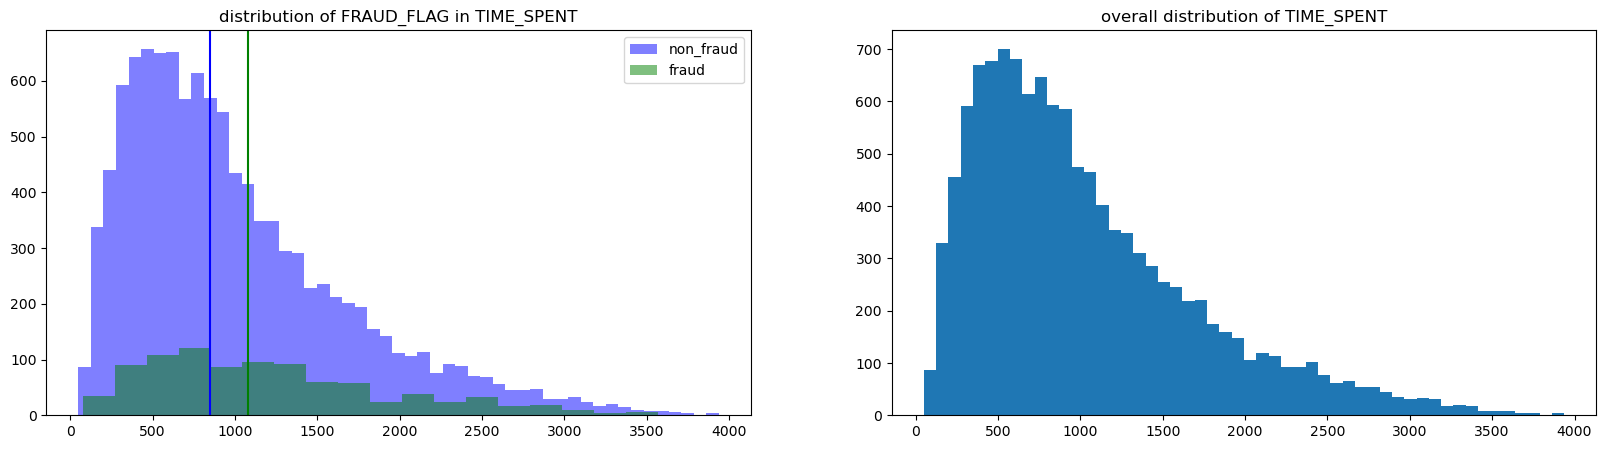

In [885]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

axs[0].hist(train_df[train_df["FRAUD_FLAG"]==0]["TIME_SPENT"], bins="auto", alpha=0.5, color="blue", label="non_fraud")
axs[0].hist(train_df[train_df["FRAUD_FLAG"]==1]["TIME_SPENT"], bins="auto", alpha=0.5, color="green", label="fraud")
axs[0].legend()
axs[0].axvline(x=train_df[train_df["FRAUD_FLAG"]==0]["TIME_SPENT"].median(), color="blue")
axs[0].axvline(x=train_df[train_df["FRAUD_FLAG"]==1]["TIME_SPENT"].median(), color="green")   
axs[0].set_title("distribution of FRAUD_FLAG in TIME_SPENT")

axs[1].hist(train_df["TIME_SPENT"], bins="auto")
axs[1].set_title("overall distribution of TIME_SPENT")

plt.show()

log transformation on the column

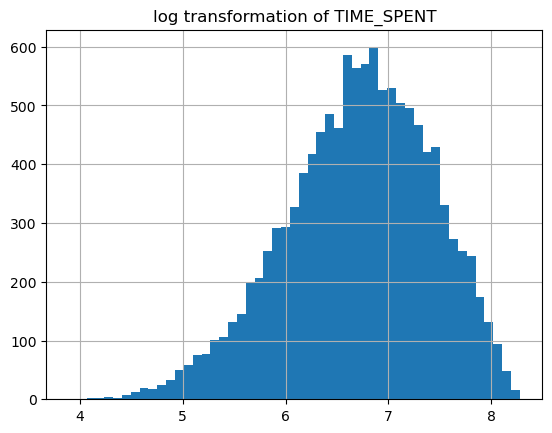

In [886]:
np.log(train_df["TIME_SPENT"]).hist(bins="auto")
plt.title("log transformation of TIME_SPENT")
plt.show()

After to the log transformation, the column's distribution now holds a more enchanting resemblance to normality. 

So, we're not just waving goodbye to the old, we're embracing the new. The log-transformed column is taking center stage, and the original is bowing out.

In [887]:
train_df["TIME_SPENT_log_transformed"] = np.log(train_df["TIME_SPENT"])
test_df["TIME_SPENT_log_transformed"] = np.log(test_df["TIME_SPENT"])

In [888]:
train_df.drop("TIME_SPENT", axis=1, inplace=True)

test_df.drop("TIME_SPENT", axis=1, inplace=True)

### **CITY**

In [889]:
city_frauds_overall = []
city_non_frauds_overall = []

city_frauds_percentage = []
city_non_frauds_percentage = []

fr = len(train_df[train_df["FRAUD_FLAG"] == 1])
non_fr = len(train_df[train_df["FRAUD_FLAG"] == 0])

cities = pd.DataFrame(train_df["CITY"].value_counts(normalize=True) * 100)
cities = cities.rename(columns={"CITY": "total transactions %"})

for col in cities.index:
    percentage_fraud = len(train_df[(train_df["FRAUD_FLAG"] == 1) & (train_df["CITY"] == col)]) / fr *100
    city_frauds_overall.append(percentage_fraud)
    
    percentage_non_fraud = len(train_df[(train_df["FRAUD_FLAG"] == 0) & (train_df["CITY"] == col)]) / non_fr *100
    city_non_frauds_overall.append(percentage_non_fraud)

cities["frauds (in all transactions) %"] = city_frauds_overall
cities["non_frauds (in all transactions) %"] = city_non_frauds_overall

sorted_indexes = cities["frauds (in all transactions) %"].sort_values(ascending= False).index

cities_sorted = cities.reindex(sorted_indexes) 
cities_sorted.head(20)

,total transactions %,frauds (in all transactions) %,non_frauds (in all transactions) %
toronto,12.694279,16.557734,12.371416
montreal,5.208771,15.141612,4.378698
scarborough,2.041502,4.901961,1.802458
brampton,5.065950,4.466231,5.116067
morinville,0.302445,3.703704,0.018207
mississauga,2.142317,3.267974,2.048248
dallas,0.285642,3.159041,0.045517
vancouver,4.335042,2.614379,4.478835
calgary,5.158363,2.505447,5.380064
ottawa,2.234731,1.851852,2.266727


Picture this: a world of cities, transactions, and frauds. We embarked on a quest to spotlight the cities that held the most transactions and the most intriguing fraud tales.

What happened next? We fused these cities into a single captivating category, creating a new realm of insights. It's like blending the finest ingredients to cook up a dish of data magic.

But that's not all – the rest of the cities, they're still part of our story, under the banner of "Other Cities." We're painting a detailed picture of the city landscape, one brushstroke at a time.

In [890]:
my_cities = ["toronto", "montreal", "scarborough", "brampton", "morinville", "mississauga", "dallas", 
             "vancouver", "calgary", "ottawa", "maple", "edmonton"]

train_df["city_categorical"] = np.where(train_df["CITY"].isin(my_cities), 1, 0)
train_df["city_categorical"] = train_df["city_categorical"].fillna(0)

test_df["city_categorical"] = np.where(test_df["CITY"].isin(my_cities), 1, 0)
test_df["city_categorical"] = test_df["city_categorical"].fillna(0)

In [891]:
train_df["city_categorical"].value_counts(normalize=True) * 100

0    56.809208
1    43.190792
Name: city_categorical, dtype: float64

In [892]:
train_df["city_categorical"] = train_df["city_categorical"].astype("category")

test_df["city_categorical"] = test_df["city_categorical"].astype("category")

In [893]:
train_df.drop("CITY", axis=1, inplace=True)

test_df.drop("CITY", axis=1, inplace=True)

In [894]:
print(train_df.shape)
print(test_df.shape)
train_df.head(2)

(11903, 113)
(2976, 113)


,FRAUD_FLAG,AVAIL_CRDT,AMOUNT,FLAG_LX,FLAG_AUTO,FLAG_APPAREL,FLAG_DEAL,FLAG_RECREA,FLAG_ENTERTAINMENT,FLAG_GIFT_CARD,FLAG_FASTFOOD,FLAG_GAS,FLAG_HIGH_AMT,FLAG_HIGH_RECREA,FLAG_INTERNET,FLAG_INTERNATIONAL,FLAG_FASHION,FLAG_LOW_AMT,FLAG_MANUAL_ENTRY,FLAG_ELCTRNCS,FLAG_SWIPE,FLAG_HEALTH,MEAN_AUTO_PAST_7DAY,MEAN_APPAREL_PAST_7DAY,MEAN_RECREA_PAST_7DAY,MEAN_GIFT_CARD_PAST_7DAY,MEAN_FASTFOOD_PAST_7DAY,MEAN_HIGH_AMT_PAST_7DAY,MEAN_INTERNATIONAL_PAST_7DAY,MEAN_FASHION_PAST_7DAY,MEAN_LOW_AMT_PAST_7DAY,MEAN_MANUAL_ENTRY_PAST_7DAY,MEAN_ELCTRNCS_PAST_7DAY,MEAN_SWIPE_PAST_7DAY,MEAN_WEEKEND_PAST_7DAY,MAX_HIGH_RECREA_PAST_7DAY,STD_LX_PAST_7DAY,STD_FASTFOOD_PAST_7DAY,STD_HIGH_AMT_PAST_7DAY,STD_INTERNET_PAST_7DAY,STD_LOW_AMT_PAST_7DAY,STD_SWIPE_PAST_7DAY,STD_HEALTH_PAST_7DAY,SUM_LX_PAST_7DAY,SUM_LOW_AMT_PAST_7DAY,SUM_PARTIAL_PAST_7DAY,SUM_SWIPE_PAST_7DAY,SUM_WEEKEND_PAST_7DAY,COUNT_AUTO_PAST_7DAY,COUNT_ENTERTAINMENT_PAST_7DAY,COUNT_INTERNET_PAST_7DAY,COUNT_MANUAL_ENTRY_PAST_7DAY,COUNT_WEEKEND_PAST_7DAY,MEAN_AUTO_PAST_30DAY,MEAN_DEAL_PAST_30DAY,MEAN_ENTERTAINMENT_PAST_30DAY,MEAN_GIFT_CARD_PAST_30DAY,MEAN_HIGH_AMT_PAST_30DAY,MEAN_LOW_AMT_PAST_30DAY,MEAN_MANUAL_ENTRY_PAST_30DAY,MEAN_ELCTRNCS_PAST_30DAY,MEAN_WEEKEND_PAST_30DAY,MAX_FASTFOOD_PAST_30DAY,MAX_PARTIAL_PAST_30DAY,STD_AUTO_PAST_30DAY,STD_APPAREL_PAST_30DAY,STD_RECREA_PAST_30DAY,STD_ENTERTAINMENT_PAST_30DAY,STD_GIFT_CARD_PAST_30DAY,STD_HIGH_RECREA_PAST_30DAY,STD_INTERNET_PAST_30DAY,STD_LOW_AMT_PAST_30DAY,STD_PARTIAL_PAST_30DAY,SUM_AUTO_PAST_30DAY,SUM_DEAL_PAST_30DAY,SUM_GIFT_CARD_PAST_30DAY,SUM_FASTFOOD_PAST_30DAY,SUM_HIGH_RECREA_PAST_30DAY,SUM_INTERNET_PAST_30DAY,SUM_LOW_AMT_PAST_30DAY,SUM_MANUAL_ENTRY_PAST_30DAY,SUM_WEEKEND_PAST_30DAY,COUNT_GIFT_CARD_PAST_30DAY,COUNT_FASTFOOD_PAST_30DAY,COUNT_ELCTRNCS_PAST_30DAY,COUNT_WEEKEND_PAST_30DAY,auto_mean_ratio,auto_sum_ratio,deal_mean30_sum30_ratio,gift_card_mean7_mean30_ratio,gas_sum7_count7_ratio,gas_sum30_count30_ratio,high_amt_sum30_count30_ratio,recrea_mean30_count_30_ratio,swipe_sum30_count30_ratio,health_mean7_count_7_ratio,health_mean30_count_30_ratio,day_of_week_categorized,hour_of_day_categorized_0,hour_of_day_categorized_1,hour_of_day_categorized_2,add-shipping-address,add-payment-method,payment-failed,update-shipping-address,update-payment-method,forgot-password,OS_FAMILY_categorized_0,OS_FAMILY_categorized_1,OS_FAMILY_categorized_2,OS_FAMILY_categorized_3,TIME_SPENT_log_transformed,city_categorical
0,1.0,7420.73,69.70,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,341.25,358.75,0.0,358.75,0.0,0.0,0.00,358.75,0.0,15.60,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,15.6,0.00,0,0,1,0,0,0.0,0.00,0.0,341.25,341.25,0.00,341.25,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,358.75,0.0,0.0,27.68,0.00,341.25,0.0,0,0,0,0,0.0,0.0,0.0,1.051282,0.00,0.0,0.0,358.75,15.6,0.0,0.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,5.973810,1
1,0.0,3825.90,1.02,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,1.02,18.52,0.0,12.35,9.91,0.0,0.0,0.0,0.0,0.0,0.0,5.81,0.0,0.0,0.97,0.0,77.9,28.27,0,0,0,0,3,0.0,34.71,0.0,0.00,0.00,0.97,18.52,28.7,16.2,0.0,0.0,0.0,11.47,23.88,0.0,0.0,9.47,47.11,0.0,0.0,0.0,173.55,0.00,0.0,62.4,116.03,10.25,19.48,210.6,0,0,0,13,0.0,0.0,0.2,0.000000,0.97,97.5,0.0,285.03,20202.6,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,6.911747,1


last check to make sure we have the same number of columns with the same name in the both test and train sets

In [895]:
train_df.isna().sum().sort_values(ascending=False)

FRAUD_FLAG                     0
MEAN_HIGH_AMT_PAST_30DAY       0
COUNT_FASTFOOD_PAST_30DAY      0
COUNT_GIFT_CARD_PAST_30DAY     0
SUM_WEEKEND_PAST_30DAY         0
                              ..
MEAN_WEEKEND_PAST_7DAY         0
MEAN_SWIPE_PAST_7DAY           0
MEAN_ELCTRNCS_PAST_7DAY        0
MEAN_MANUAL_ENTRY_PAST_7DAY    0
city_categorical               0
Length: 113, dtype: int64

## **Saving the transformed datasets**

In [896]:
train_df.to_csv("train_after_EDA_2.csv", index=False)
test_df.to_csv("test_after_EDA_2.csv", index=False)

# **Concluding the Exploration: A Transformative Journey**

As we wrap up this leg of our data adventure, let's take a moment to reflect on the path we've tread. In this section, we embarked on a thorough Exploratory Data Analysis (EDA), dissecting the intricacies of our dataset in search of insights that would illuminate the world of fraud detection.

With a discerning eye, we bid farewell to unnecessary features and those that seemed less relevant to our pursuit. Every drop was a step towards refinement, a commitment to focusing our analysis on what truly matters.

But our journey didn't stop at subtraction. We ventured into the realm of creation, crafting new features and ratios that held the promise of unveiling deeper layers of understanding. It was like adding new colors to an ever-evolving canvas.

And now, as we close this chapter, we find ourselves looking at a dataset that's been pruned, nurtured, and reimagined. This dataset, enriched by our explorations, is poised to become the bedrock for our model training – a testament to the power of analysis and the art of crafting insights from raw data.

Stay with me as we transition to the next phase, where our journey continues with modeling and discovery on the horizon. Until then, let the lessons of EDA guide our way forward.